In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import seaborn as sns

## Base vs Ensemble Learners

### Data Loading

In [4]:
en_year_test = joblib.load("../split_year_models/ensemble/models_test_values.pkl")
en_income_test = joblib.load("../split_income_models/ensemble/models_test_values.pkl")

In [5]:
base_year_mean = joblib.load('../split_year_models/base_mean_metrics.pkl')
base_year_std = joblib.load('../split_year_models/base_std_metrics.pkl')
base_inc_mean = joblib.load('../split_income_models/base_mean_metrics.pkl')
base_inc_std = joblib.load('../split_income_models/base_std_metrics.pkl')

In [6]:
metrics = ['Relative Error', 'MAE', 'RMSE', 'MSE', 'R2']

In [7]:
en_income_test = en_income_test.rename(index={'Random Forest':'Random Forest Ensemble'})

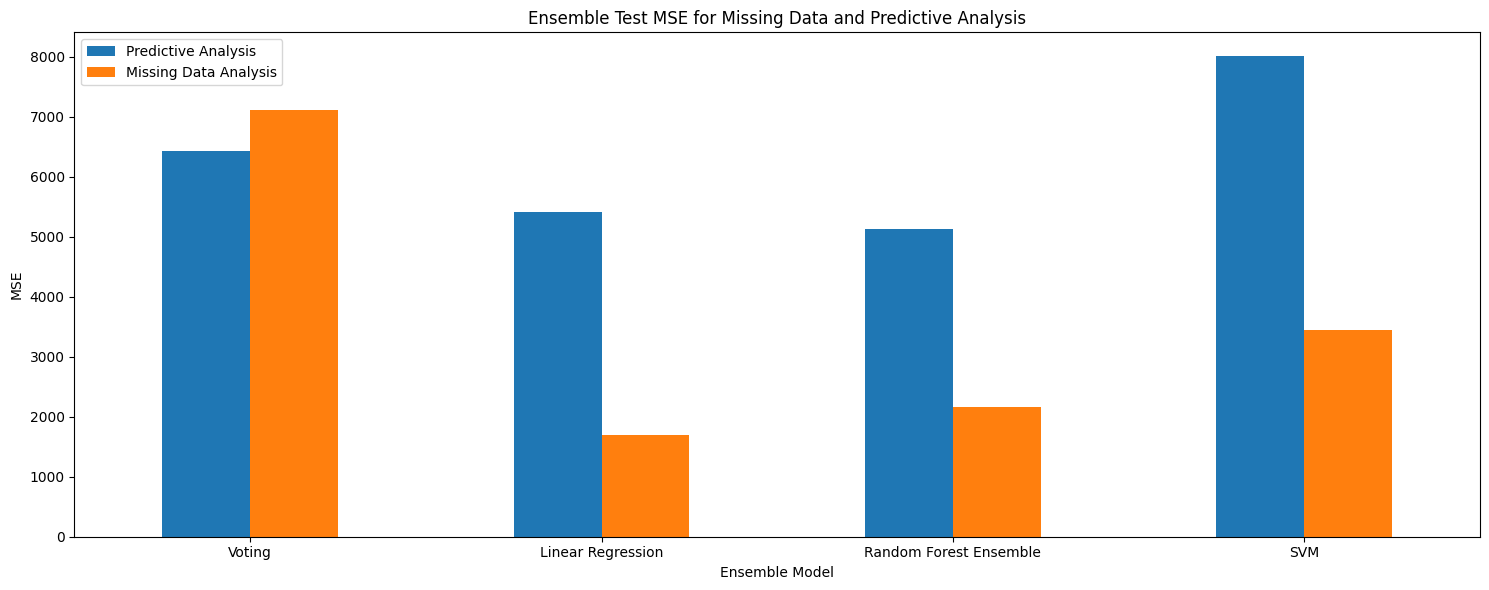

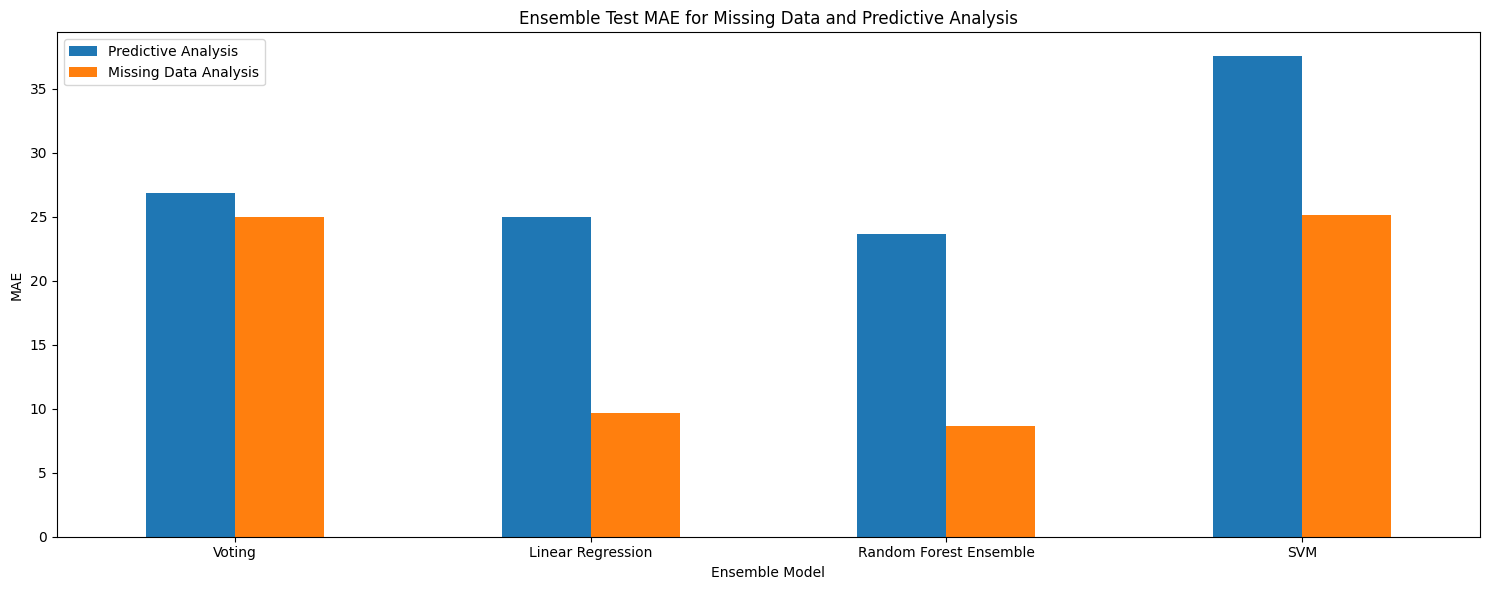

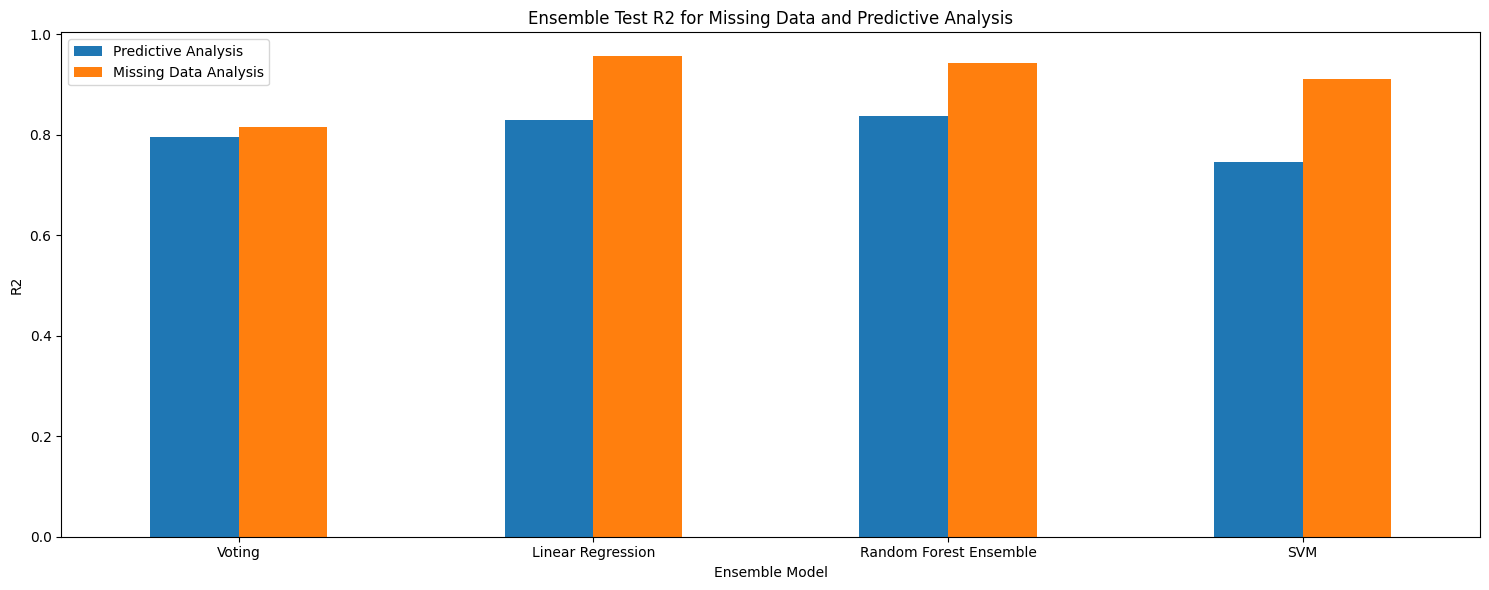

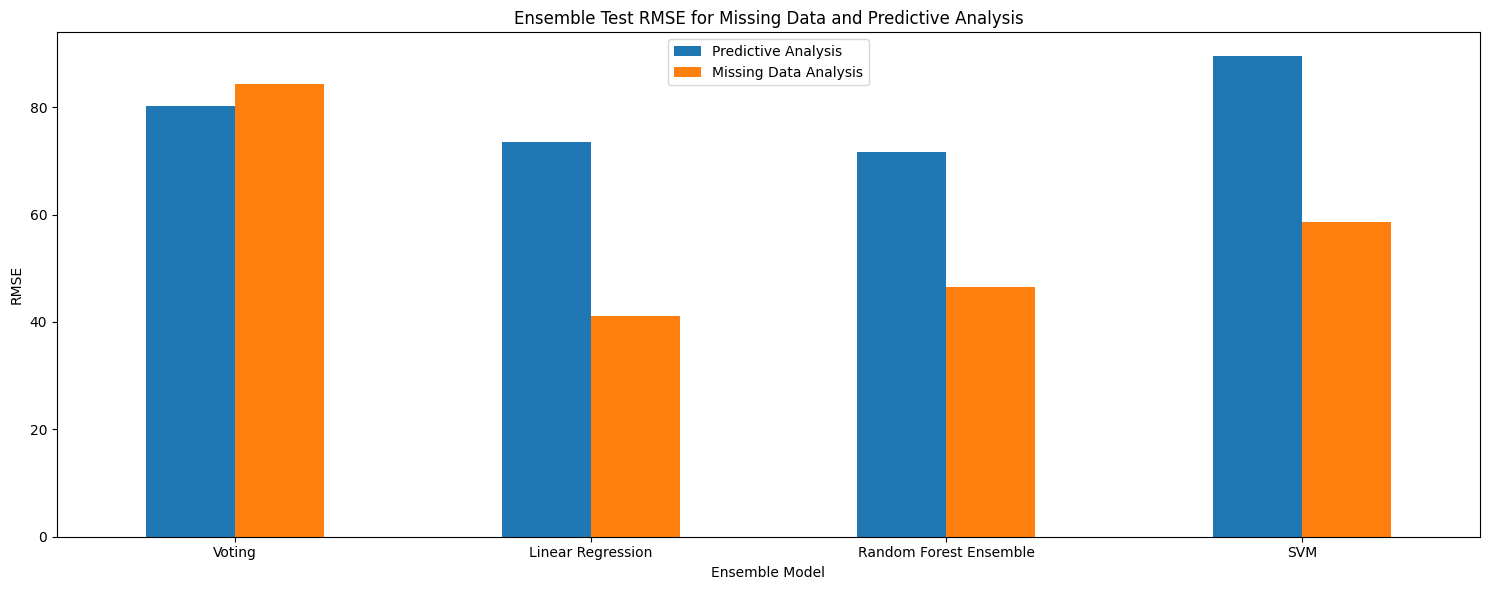

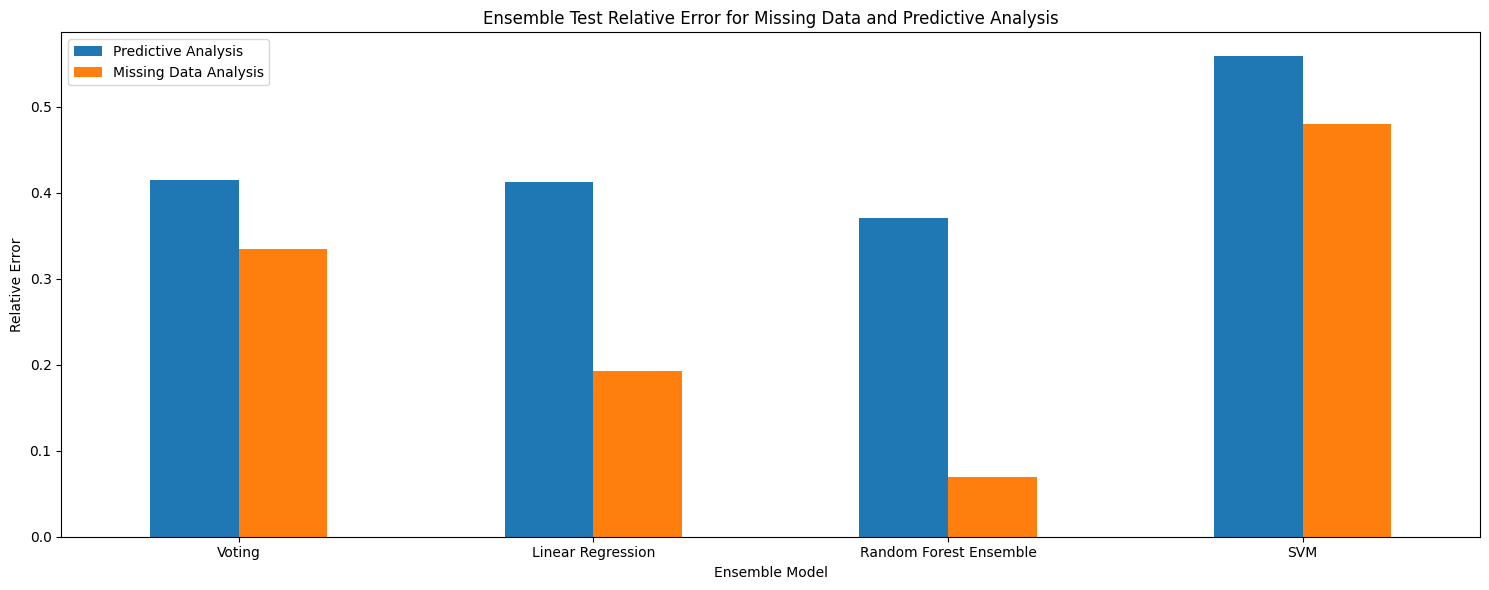

In [53]:
for metric in en_year_test.columns:
    year = en_year_test.reset_index()
    inc = en_income_test.reset_index()
    ensemble_values = pd.merge(pd.DataFrame(year[['index', metric]]), pd.DataFrame(inc[['index', metric]]), on=['index'])
    ensemble_values.index = ['Voting', 'Linear Regression', 'Random Forest Ensemble', 'SVM']
    ensemble_values.plot.bar(figsize=(15, 6), rot=0, capsize=3)
    plt.title('Ensemble Test ' + metric + " for Missing Data and Predictive Analysis")
    plt.xlabel("Ensemble Model")
    plt.ylabel(metric)
    plt.tight_layout()
    plt.legend(['Predictive Analysis', 'Missing Data Analysis'])
    plt.show()

### PA and MDA Together

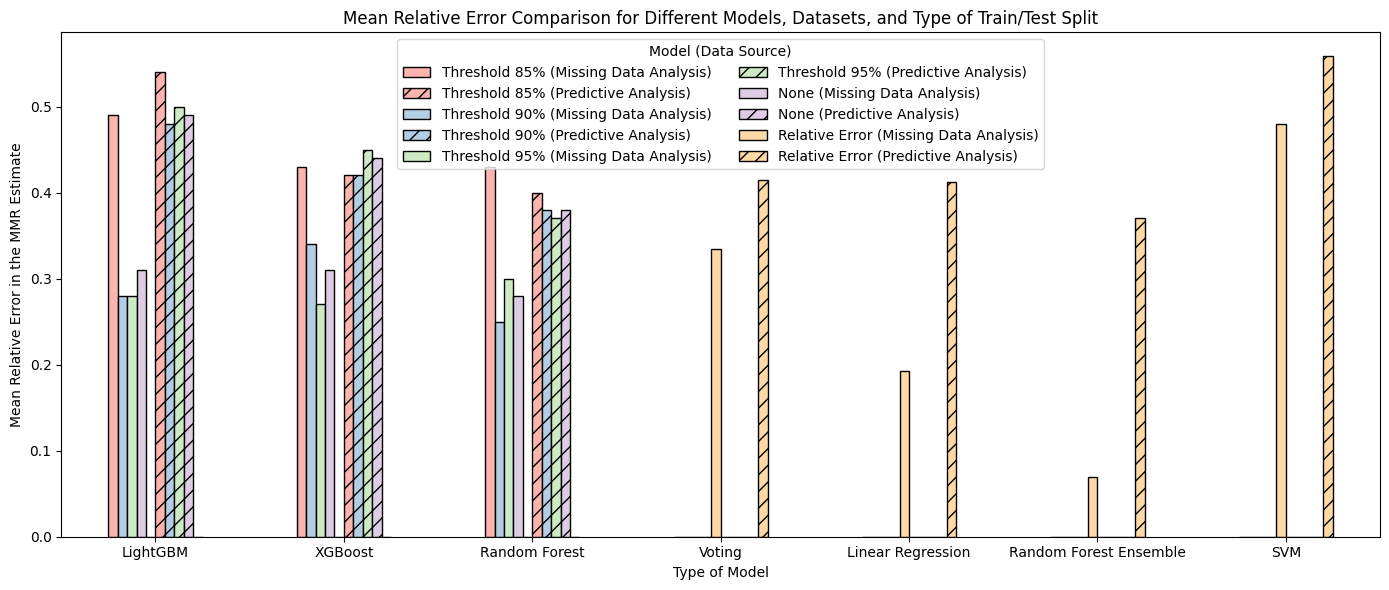

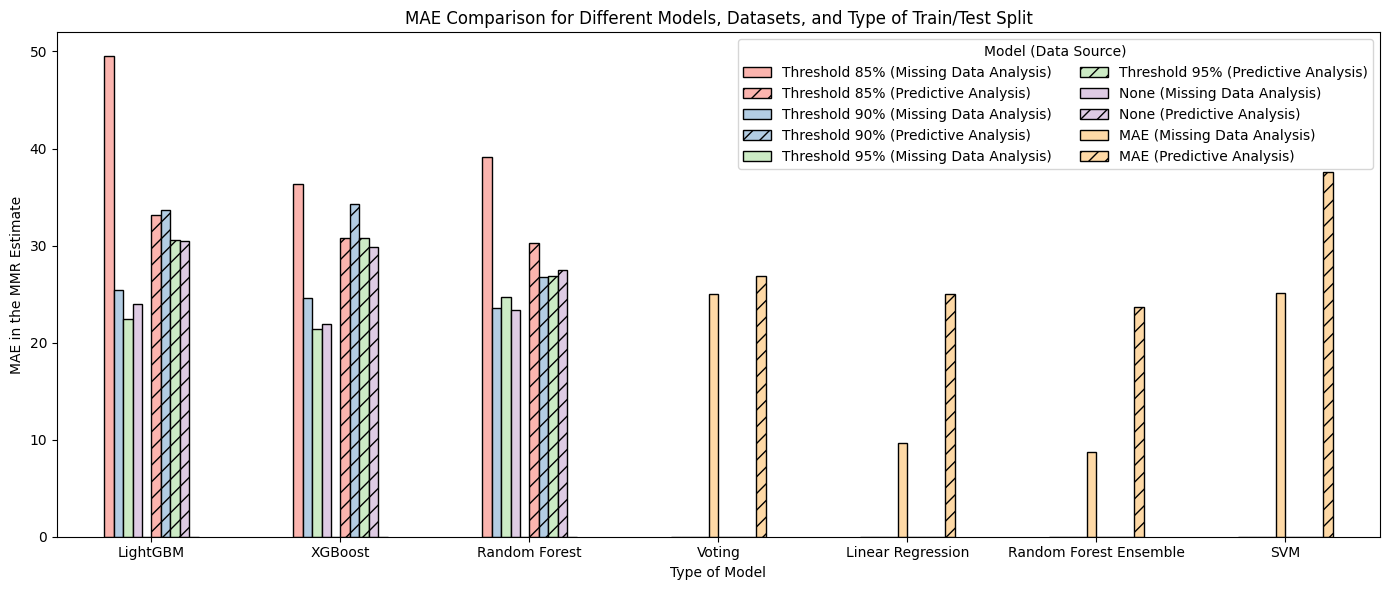

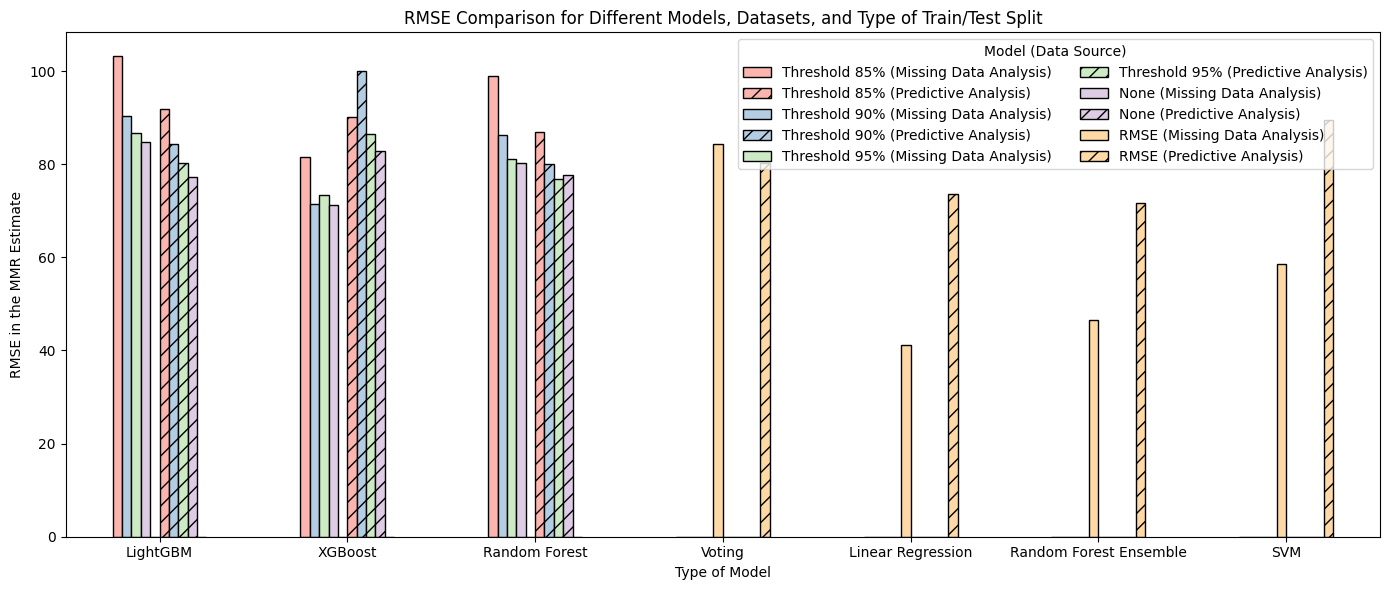

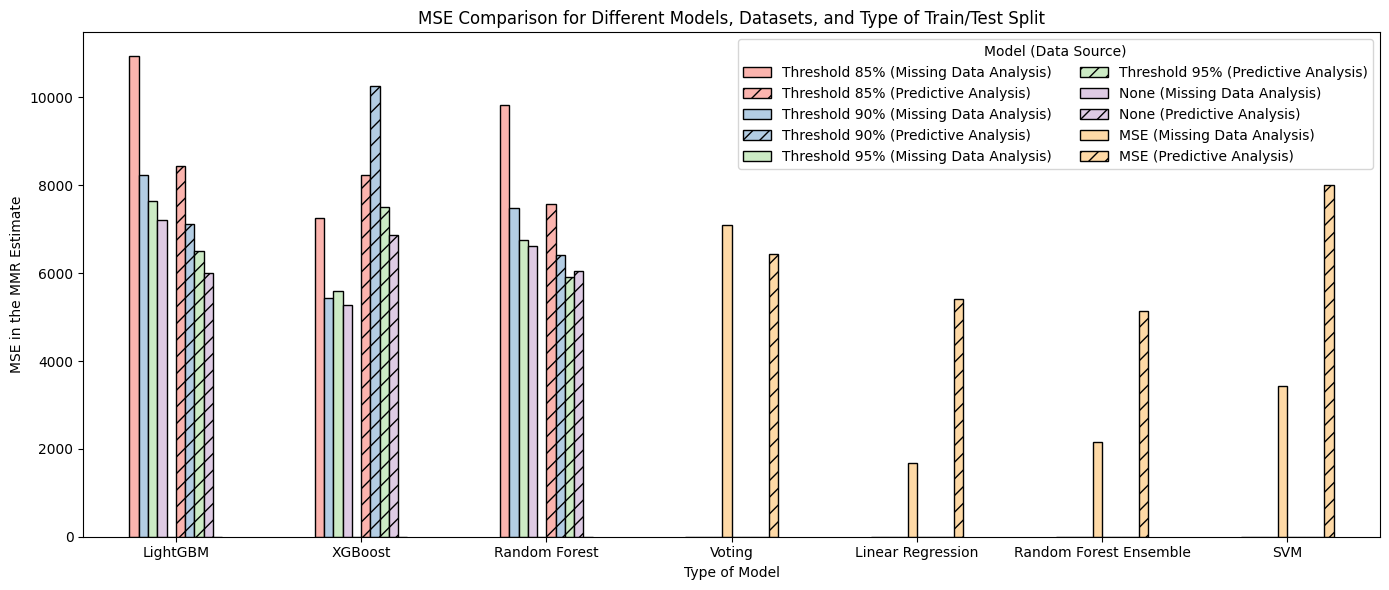

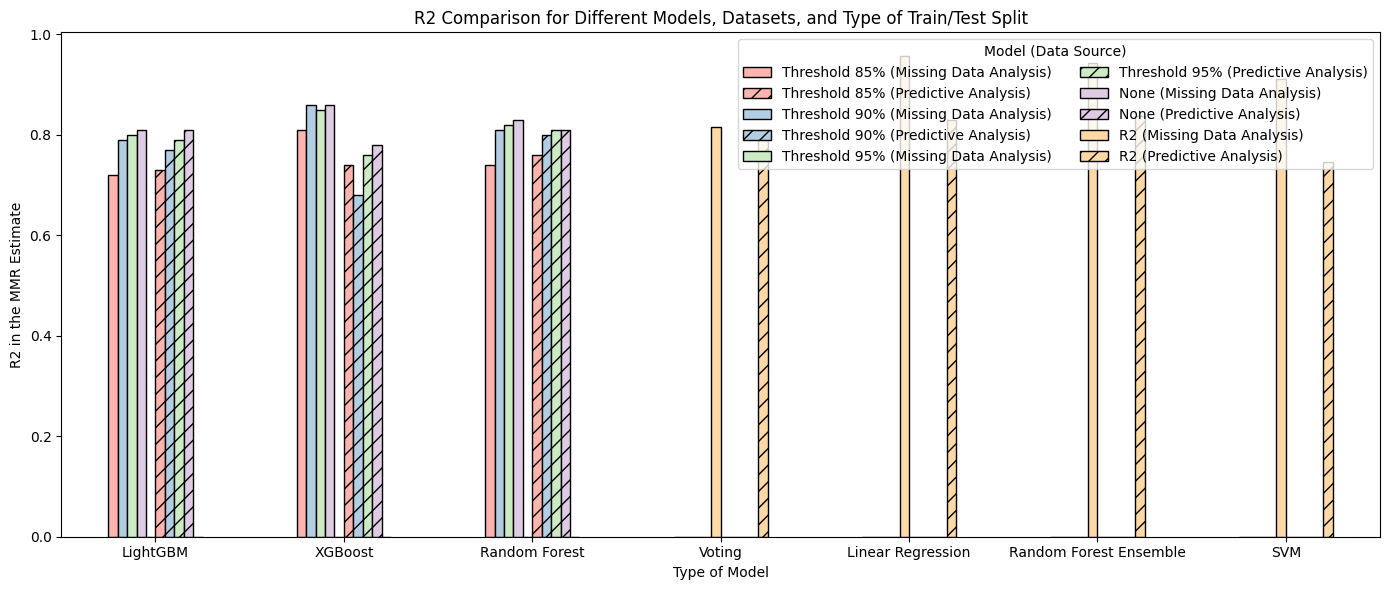

In [147]:
hatch_patterns = {'Predictive Analysis': '//', 'Missing Data': ''}
color_palette = plt.cm.Pastel1.colors  # Enough distinct colors for up to ~8 models

for metric in metrics:
    # Process year test data
    data_metric_year = en_year_test[metric]    
    data_mean_year = base_year_mean.xs(metric, axis=1, level='Metric')
    error_year = base_year_std.xs(metric, axis=1, level='Metric')

    # Combine year data for plotting
    combined_df_year = pd.concat([data_mean_year.transpose(), data_metric_year], axis=1)

    # Process income test data
    data_metric_income = en_income_test[metric]    
    data_mean_income = base_inc_mean.xs(metric, axis=1, level='Metric')
    error_income = base_inc_std.xs(metric, axis=1, level='Metric')

    # Combine income data for plotting
    combined_df_income = pd.concat([data_mean_income.transpose(), data_metric_income],axis=1)

    combined_df_year_name = combined_df_year.copy()
    combined_df_year_name.columns = pd.MultiIndex.from_product([combined_df_year.columns, ['Predictive Analysis']])

    combined_df_income_name = combined_df_income.copy()
    combined_df_income_name.columns = pd.MultiIndex.from_product([combined_df_income.columns, ['Missing Data Analysis']])

    combined_df = pd.concat([combined_df_income_name, combined_df_year_name], axis=1)

    ax = combined_df.plot.bar(rot=0, figsize=(14, 6), legend=False)

# Assign hatching and colors
    num_bars = len(combined_df.columns)
    for i, (col, bar_group) in enumerate(zip(combined_df.columns, ax.containers)):
        model_name, source = col
        color_idx = list(combined_df.columns.get_level_values(0)).index(model_name) % len(color_palette)
        hatch = hatch_patterns.get(source, '')

        for bar in bar_group:
            bar.set_hatch(hatch)
            bar.set_facecolor(color_palette[color_idx])
            bar.set_edgecolor('black')

    # === Custom Legend ===
    from matplotlib.patches import Patch
    models = combined_df.columns.get_level_values(0).unique()
    sources = combined_df.columns.get_level_values(1).unique()

    legend_patches = []
    for model in models:
        color = color_palette[list(models).index(model) % len(color_palette)]
        for source in sources:
            hatch = hatch_patterns.get(source, '')
            patch = Patch(facecolor=color, hatch=hatch, edgecolor='black',
                          label=f"{model} ({source})")
            legend_patches.append(patch)

    if metric == 'Relative Error':
        metric_name = 'Mean Relative Error'
    else:
        metric_name = metric

    ax.legend(handles=legend_patches, title="Model (Data Source)", ncol=2)
    ax.set_title(f"{metric_name} Comparison for Different Models, Datasets, and Type of Train/Test Split")
    ax.set_ylabel(metric_name + ' in the MMR Estimate')
    ax.set_xlabel('Type of Model')
    plt.tight_layout()
    plt.show()

### Country-Level Prediction

In [183]:
combined_df_income_name

Threshold 85%  Threshold 90%  \
LightGBM \n Base Estimator                   0.49           0.28   
XGBoost \n Base Estimator                    0.43           0.34   
Random Forest \n Base Estimator              0.43           0.25   
Voting Ensemble                               NaN            NaN   
Elastic Net \n Stacking Ensemble              NaN            NaN   
Random Forest \n Stacking Ensemble            NaN            NaN   
SVM \n Stacking Ensemble                      NaN            NaN   

                                    Threshold 95%  None Relative Error  
LightGBM \n Base Estimator                   0.28  0.31            NaN  
XGBoost \n Base Estimator                    0.27  0.31            NaN  
Random Forest \n Base Estimator              0.30  0.28            NaN  
Voting Ensemble                               NaN   NaN       0.334763  
Elastic Net \n Stacking Ensemble              NaN   NaN       0.192428  
Random Forest \n Stacking Ensemble            NaN   NaN       0.069516  
SVM \n Stacking Ensemble                      NaN   NaN       0.479697

In [195]:
t = error_income.T
t.index

Index(['LightGBM', 'XGBoost', 'Random Forest'], dtype='object', name='Model')

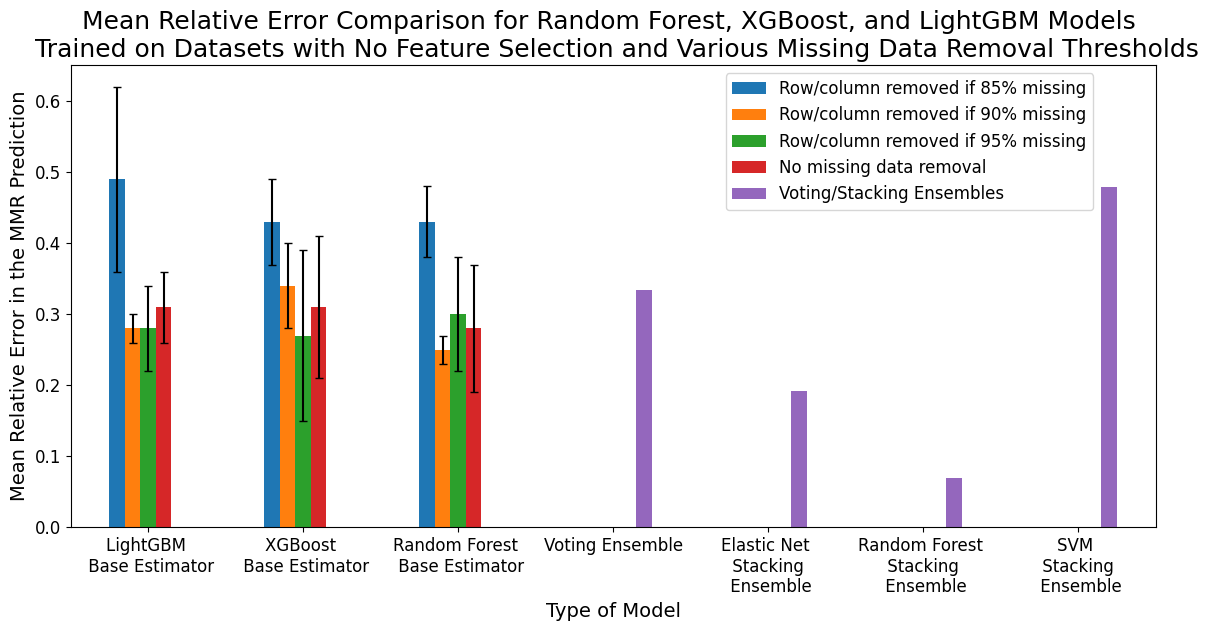

In [218]:
color_palette = plt.cm.Pastel1.colors  # Enough distinct colors for up to ~8 models
# Process income test data
data_metric_income = en_income_test['Relative Error']    
data_mean_income = base_inc_mean.xs('Relative Error', axis=1, level='Metric')
error_income = base_inc_std.xs('Relative Error', axis=1, level='Metric')
error_income = error_income.T
error_income.index = ['LightGBM \n Base Estimator', 'XGBoost \n Base Estimator', 'Random Forest \n Base Estimator']

# Combine income data for plotting
combined_df_income = pd.concat([data_mean_income.transpose(), data_metric_income],axis=1)

combined_df_income_name = combined_df_income.copy()
combined_df_income_name.index = ['LightGBM \n Base Estimator', 'XGBoost \n Base Estimator', 'Random Forest \n Base Estimator', 'Voting Ensemble', 'Elastic Net \n Stacking \n Ensemble', 'Random Forest \n Stacking \n Ensemble', 'SVM \n Stacking \n Ensemble',]
#combined_df = pd.concat([combined_df_income_name, combined_df_year_name], axis=1)

ax = combined_df_income_name.plot.bar(rot=0, figsize=(14, 6), legend=False, yerr=error_income, capsize=3)

ax.set_title(f"Mean Relative Error Comparison for Random Forest, XGBoost, and LightGBM Models \n Trained on Datasets with No Feature Selection and Various Missing Data Removal Thresholds", fontsize=18)
ax.set_ylabel("Mean Relative Error in the MMR Prediction", fontsize=14)
ax.set_xlabel('Type of Model', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Row/column removed if 85% missing', 'Row/column removed if 90% missing', 'Row/column removed if 95% missing', 'No missing data removal', 'Voting/Stacking Ensembles'], loc='upper right', bbox_to_anchor=(0.95, 1), fontsize=12)
plt.show()

### forecasting

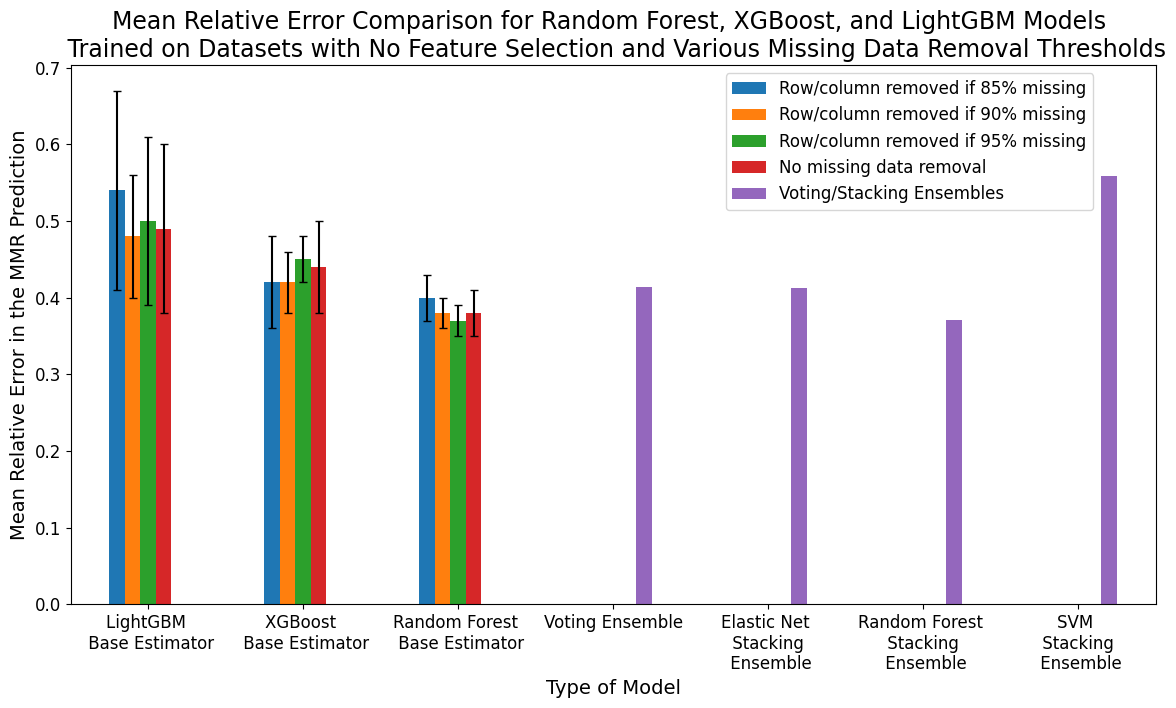

In [221]:
color_palette = plt.cm.Pastel1.colors  # Enough distinct colors for up to ~8 models
# Process year test data
data_metric_year = en_year_test['Relative Error']    
data_mean_year = base_year_mean.xs('Relative Error', axis=1, level='Metric')
error_year = base_year_std.xs('Relative Error', axis=1, level='Metric')
error_year = error_year.T
error_year.index = ['LightGBM \n Base Estimator', 'XGBoost \n Base Estimator', 'Random Forest \n Base Estimator']

# Combine year data for plotting
combined_df_year = pd.concat([data_mean_year.transpose(), data_metric_year],axis=1)

combined_df_year_name = combined_df_year.copy()
combined_df_year_name.index = ['LightGBM \n Base Estimator', 'XGBoost \n Base Estimator', 'Random Forest \n Base Estimator', 'Voting Ensemble', 'Elastic Net \n Stacking \n Ensemble', 'Random Forest \n Stacking \n Ensemble', 'SVM \n Stacking \n Ensemble',]
#combined_df = pd.concat([combined_df_year_name, combined_df_year_name], axis=1)

ax = combined_df_year_name.plot.bar(rot=0, figsize=(14, 7), legend=False, yerr=error_year, capsize=3)

ax.set_title(f"Mean Relative Error Comparison for Random Forest, XGBoost, and LightGBM Models \n Trained on Datasets with No Feature Selection and Various Missing Data Removal Thresholds", fontsize=17)
ax.set_ylabel("Mean Relative Error in the MMR Prediction", fontsize=14)
ax.set_xlabel('Type of Model', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(['Row/column removed if 85% missing', 'Row/column removed if 90% missing', 'Row/column removed if 95% missing', 'No missing data removal', 'Voting/Stacking Ensembles'], loc='upper right', bbox_to_anchor=(0.95, 1), fontsize=12)
plt.show()

### Voting and Ensemble Models

In [126]:
test_stats_year = joblib.load("../split_year_models/ensemble/models_test_values.pkl")
test_stats_inc = joblib.load("../split_income_models/ensemble/models_test_values.pkl")

#### Country-Level Prediction

In [603]:
test_stats_year['MSE']

Voting                                6435.786576
Elastic Net \n Stacking Ensemble       5408.42269
Random Forest \n Stacking Ensemble    5134.177722
SVM Stacking Ensemble                 8007.676687
Name: MSE, dtype: object

In [ ]:
Elastic Net \n Stacking Ensemble      0.192428
Random Forest \n Stacking Ensemble    0.069516

In [663]:
0.192428/(0.069516)

2.768110938488981

In [664]:
2160.906806/(1689.050046)

1.2793622137588219

In [ ]:
Elastic Net \n Stacking Ensemble      1689.050046
Random Forest \n Stacking Ensemble    2160.906806

In [665]:
5134/4773

1.075633773308192

Voting                                25.005704
Elastic Net \n Stacking Ensemble       9.692333
Random Forest \n Stacking Ensemble     8.683495
SVM Stacking Ensemble                 25.158299
Name: MAE, dtype: object


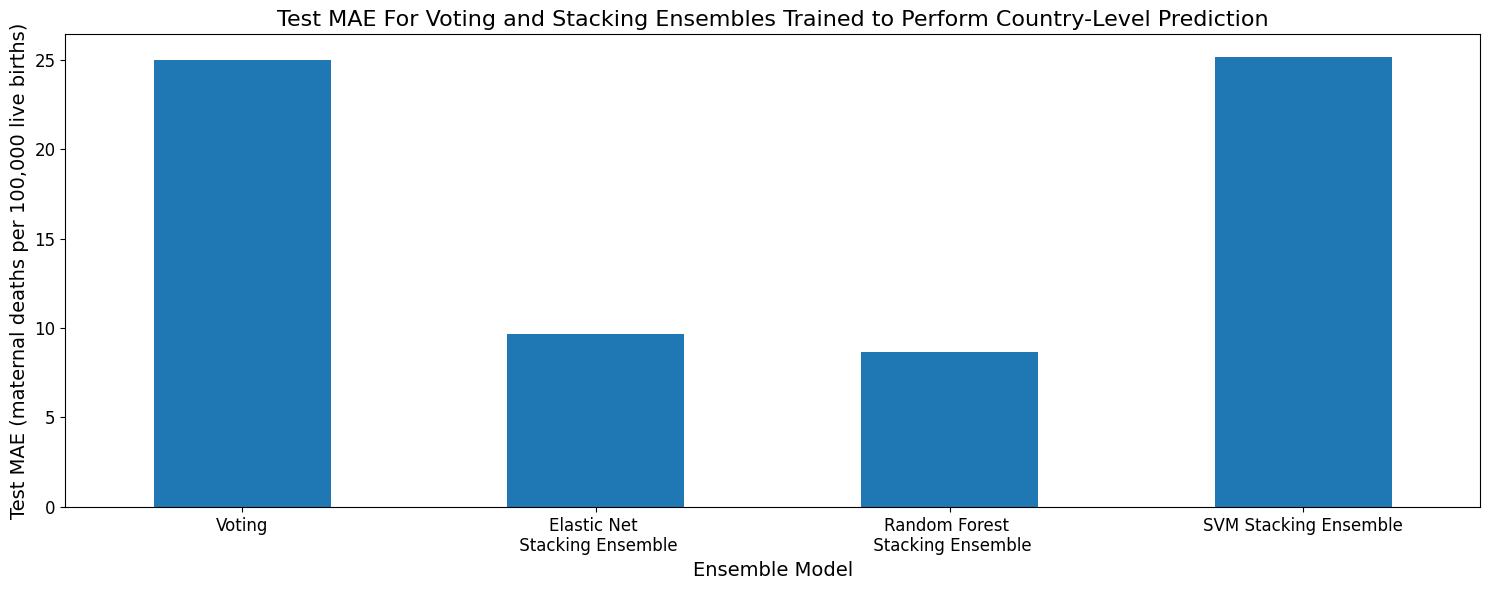

Voting                                0.334763
Elastic Net \n Stacking Ensemble      0.192428
Random Forest \n Stacking Ensemble    0.069516
SVM Stacking Ensemble                 0.479697
Name: Relative Error, dtype: object


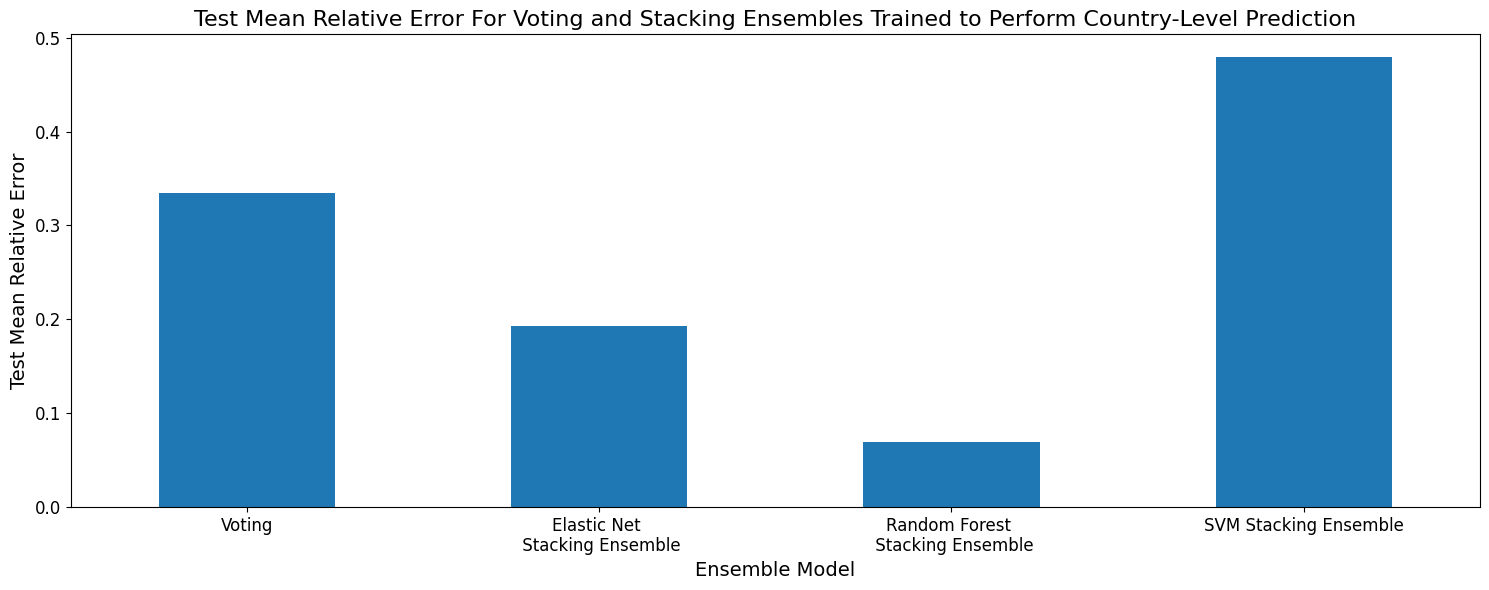

Voting                                7107.206787
Elastic Net \n Stacking Ensemble      1689.050046
Random Forest \n Stacking Ensemble    2160.906806
SVM Stacking Ensemble                 3441.256655
Name: MSE, dtype: object


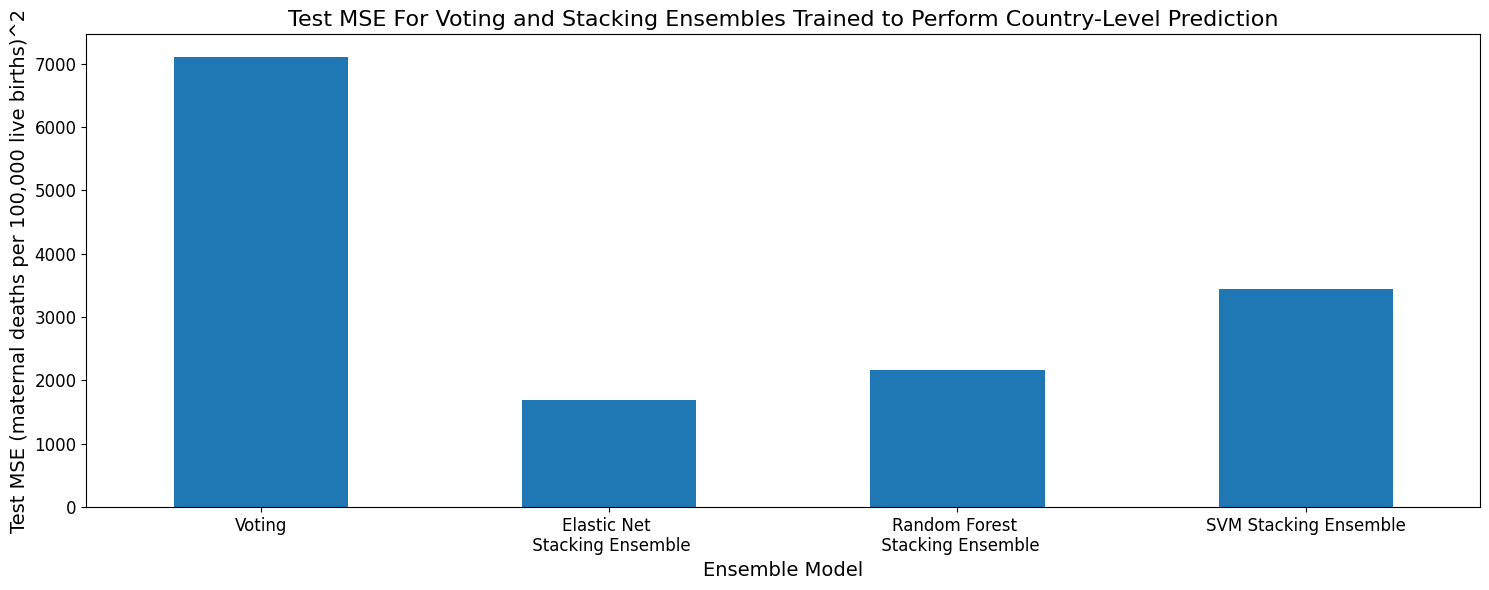

Voting                                84.304251
Elastic Net \n Stacking Ensemble      41.098054
Random Forest \n Stacking Ensemble    46.485555
SVM Stacking Ensemble                 58.662225
Name: RMSE, dtype: object


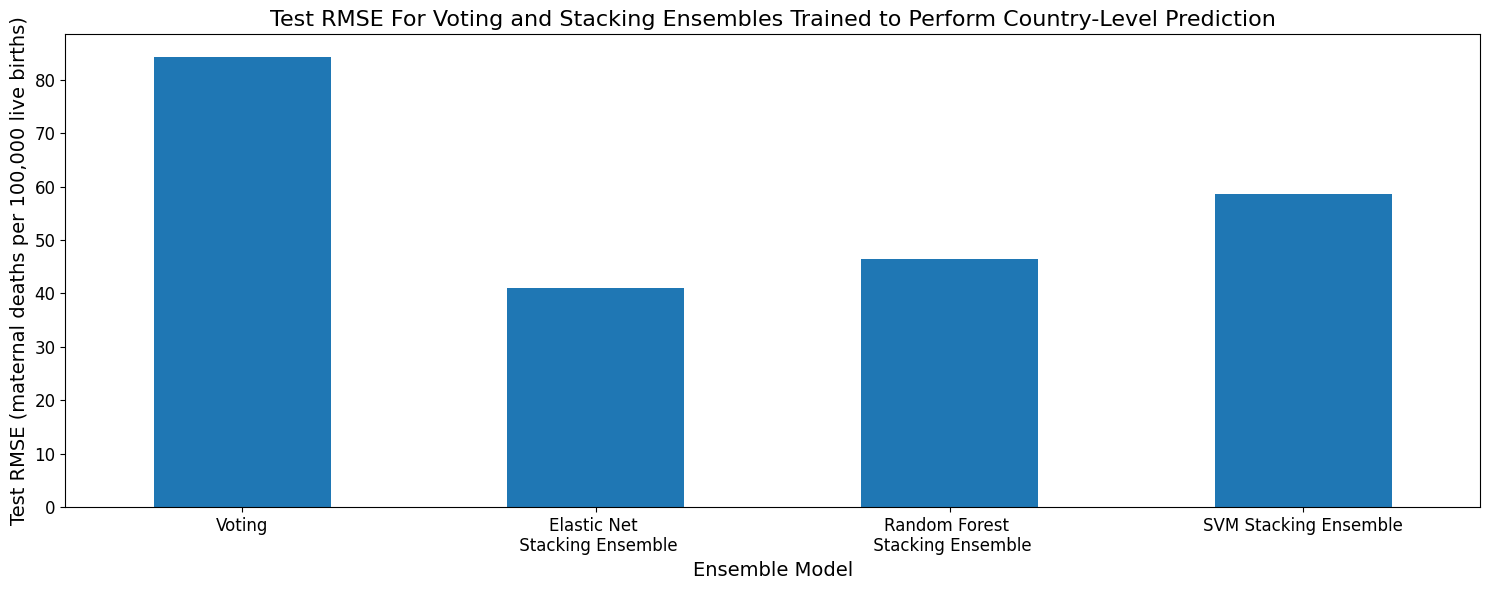

Voting                                0.815028
Elastic Net \n Stacking Ensemble      0.956041
Random Forest \n Stacking Ensemble     0.94376
SVM Stacking Ensemble                 0.910438
Name: R2, dtype: object


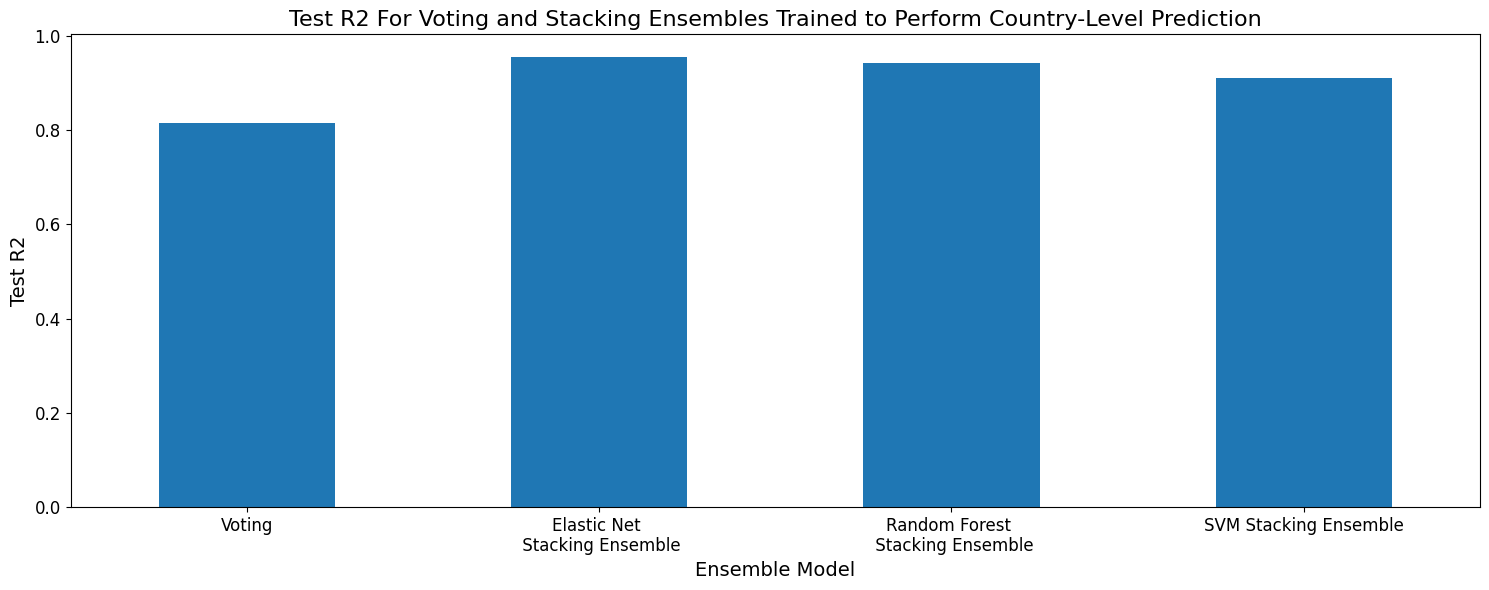

In [655]:
for metric in ['MAE', 'Relative Error', 'MSE', 'RMSE', 'R2']:
    mean_vals = test_stats_inc[metric]

    mean_vals.plot.bar(figsize=(15, 6), rot=0, capsize=3)
    if metric == 'Relative Error':
        metric_title = 'Mean Relative Error'
        metric_name = metric_title
    elif metric == 'MAE':
        metric_title = metric
        metric_name = 'MAE (maternal deaths per 100,000 live births)'
    elif metric == 'RMSE':
        metric_title = metric
        metric_name = 'RMSE (maternal deaths per 100,000 live births)'
    elif metric == 'MSE':
        metric_title = metric
        metric_name = 'MSE (maternal deaths per 100,000 live births)^2'
    else:
        metric_title = metric
        metric_name = metric

    plt.title("Test " + metric_title + " For Voting and Stacking Ensembles Trained to Perform Country-Level Prediction", fontsize=16)
    plt.xlabel("Ensemble Model", fontsize=14)
    plt.ylabel('Test ' + metric_name, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    print(test_stats_inc[metric])
    plt.show()

#### Forecasting

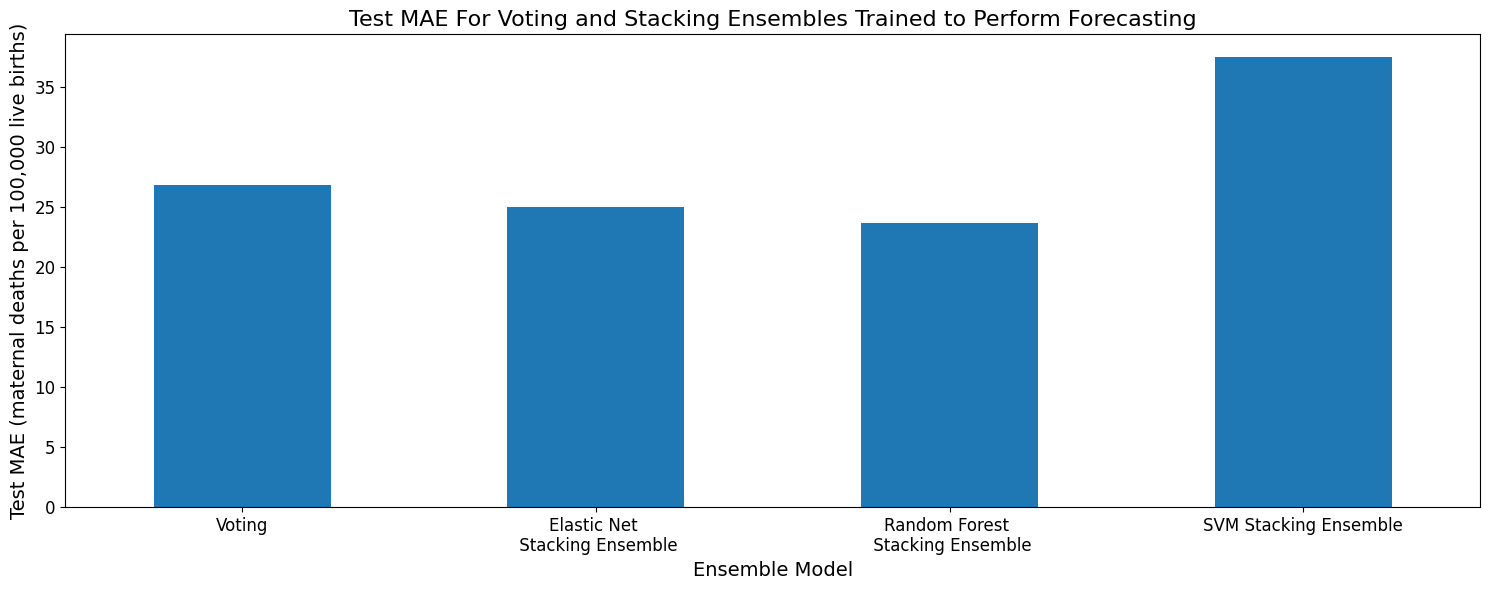

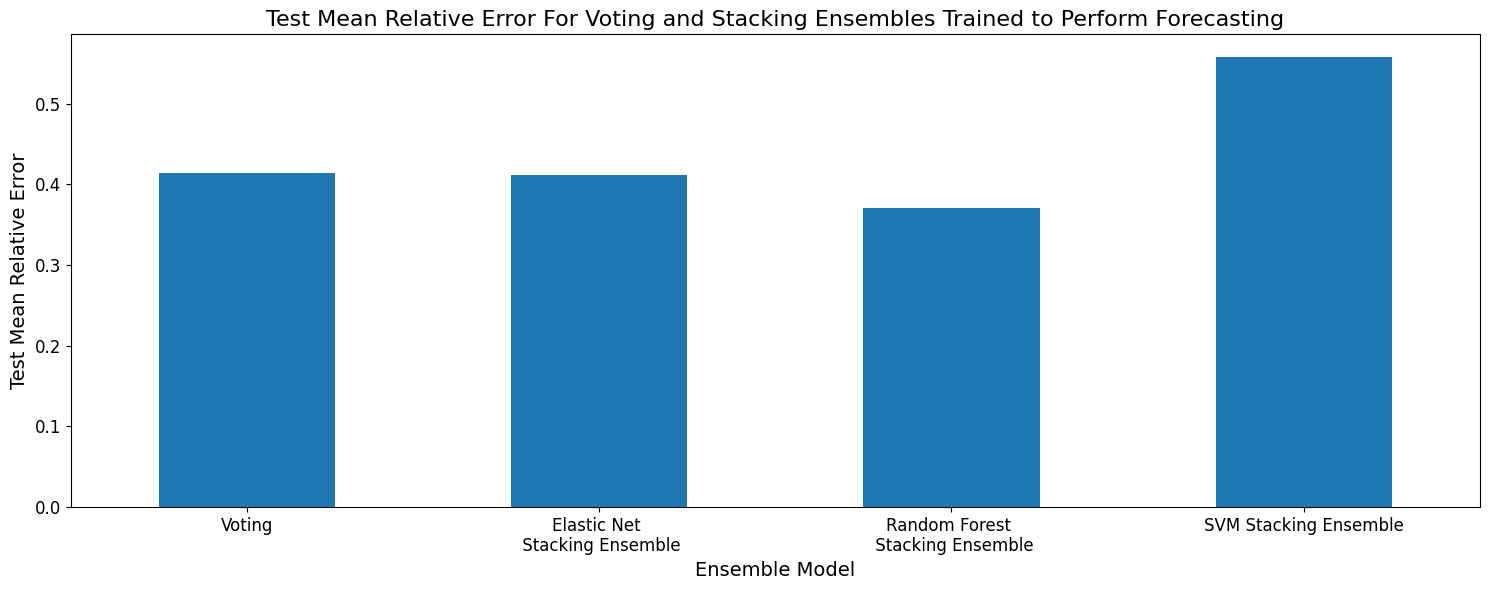

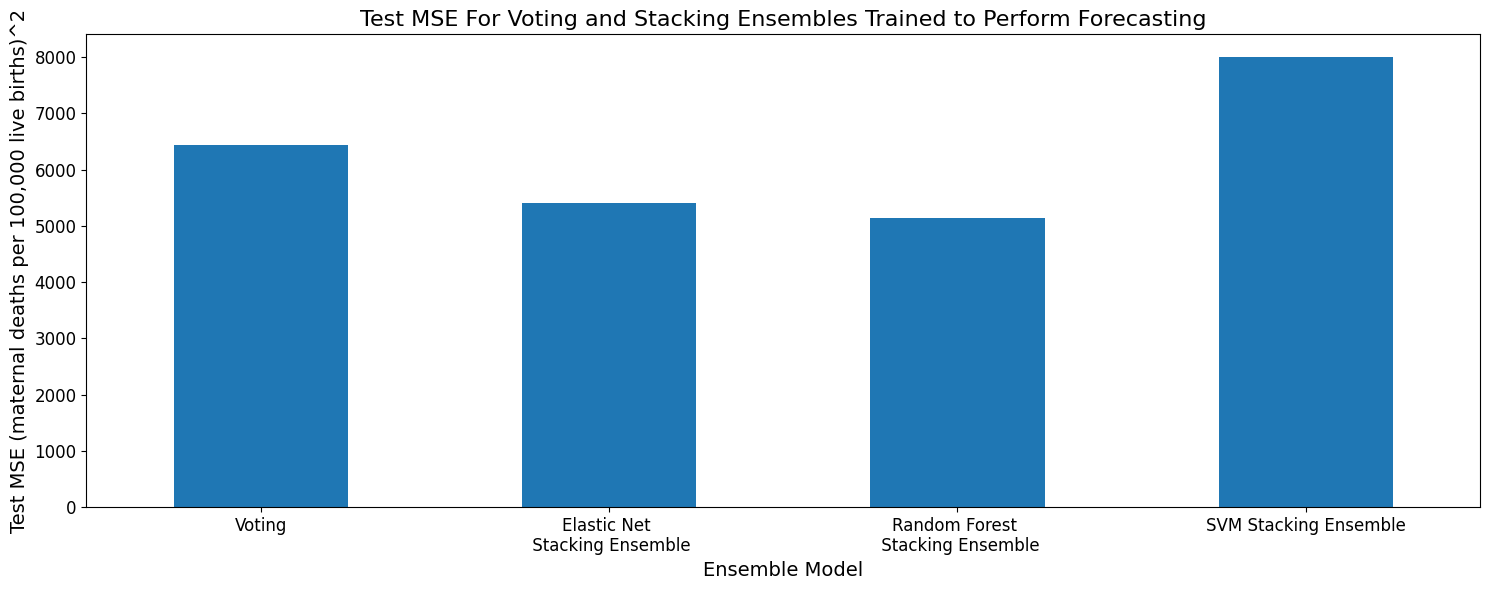

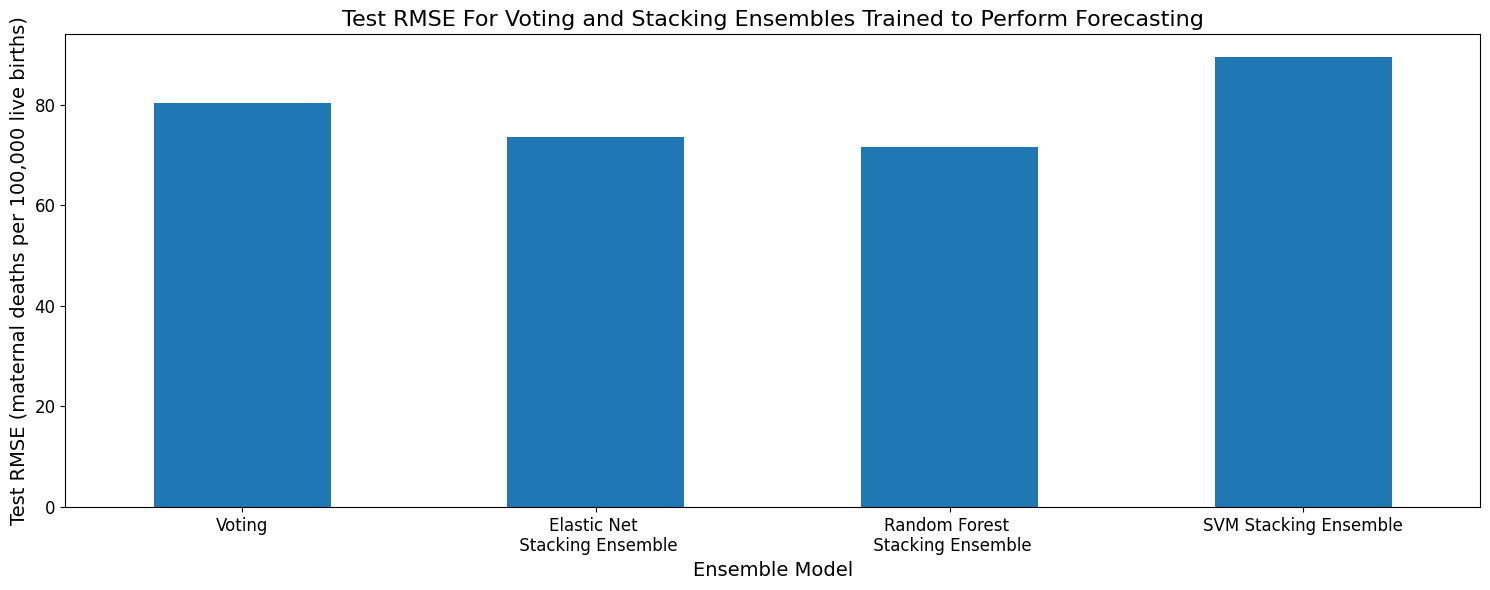

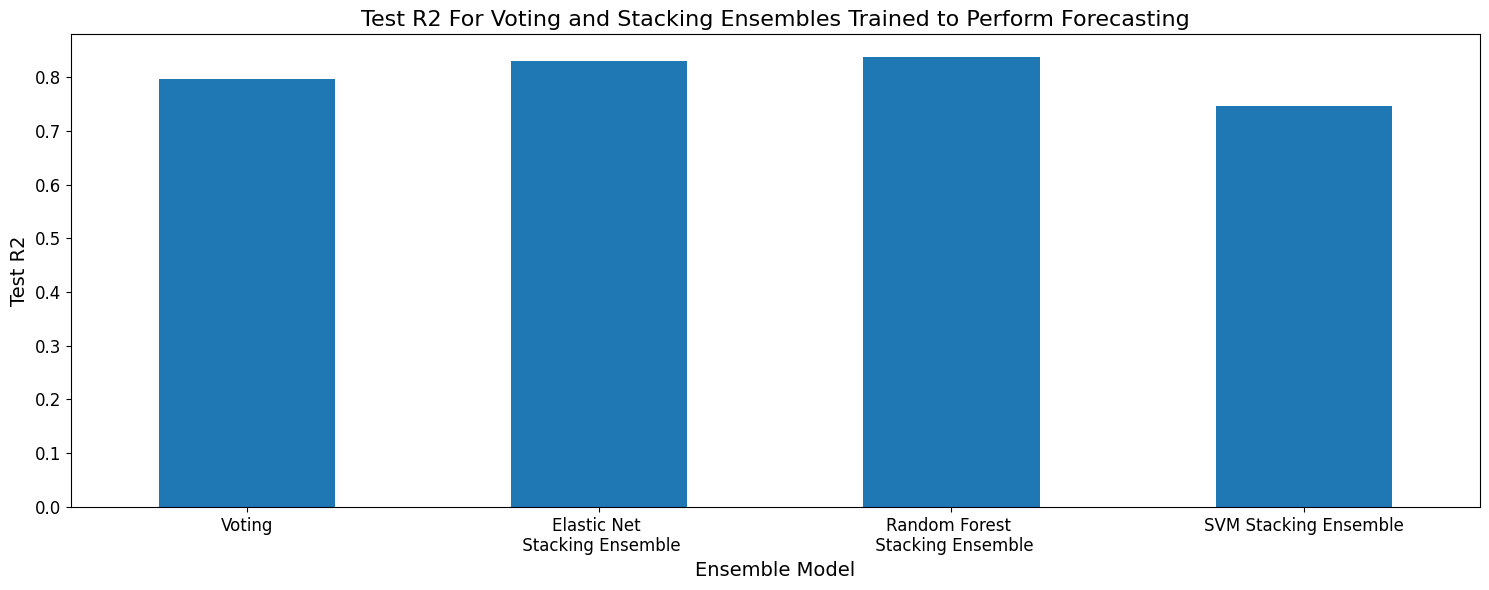

In [651]:
for metric in ['MAE', 'Relative Error', 'MSE', 'RMSE', 'R2']:
    mean_vals = test_stats_year[metric]

    mean_vals.plot.bar(figsize=(15, 6), rot=0, capsize=3)
    if metric == 'Relative Error':
        metric_title = 'Mean Relative Error'
        metric_name = metric_title
    elif metric == 'MAE':
        metric_title = metric
        metric_name = 'MAE (maternal deaths per 100,000 live births)'
    elif metric == 'RMSE':
        metric_title = metric
        metric_name = 'RMSE (maternal deaths per 100,000 live births)'
    elif metric == 'MSE':
        metric_title = metric
        metric_name = 'MSE (maternal deaths per 100,000 live births)^2'
    else:
        metric_title = metric
        metric_name = metric

    plt.title("Test " + metric_title + " For Voting and Stacking Ensembles Trained to Perform Forecasting", fontsize=16)
    plt.xlabel("Ensemble Model", fontsize=14)
    plt.ylabel('Test ' + metric_name, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

#### Together

In [127]:
test_stats_inc['Type of Analysis'] = 'Missing Data Analysis'
test_stats_inc.index = ['Voting', 'Elastic Net \n Stacking Ensemble', 'Random Forest \n Stacking Ensemble', 'SVM Stacking Ensemble']
test_stats_year['Type of Analysis'] = 'Predictive Analysis'
test_stats_year.index = ['Voting', 'Elastic Net \n Stacking Ensemble', 'Random Forest \n Stacking Ensemble', 'SVM Stacking Ensemble']
test_stats = pd.concat([test_stats_inc, test_stats_year])
test_stats = test_stats.reset_index()
test_stats = test_stats.melt(id_vars=['index', 'Type of Analysis'], var_name='Metric', value_name='Value')

In [128]:
test_stats

index       Type of Analysis          Metric  \
0                               Voting  Missing Data Analysis             MSE   
1     Elastic Net \n Stacking Ensemble  Missing Data Analysis             MSE   
2   Random Forest \n Stacking Ensemble  Missing Data Analysis             MSE   
3                SVM Stacking Ensemble  Missing Data Analysis             MSE   
4                               Voting    Predictive Analysis             MSE   
5     Elastic Net \n Stacking Ensemble    Predictive Analysis             MSE   
6   Random Forest \n Stacking Ensemble    Predictive Analysis             MSE   
7                SVM Stacking Ensemble    Predictive Analysis             MSE   
8                               Voting  Missing Data Analysis             MAE   
9     Elastic Net \n Stacking Ensemble  Missing Data Analysis             MAE   
10  Random Forest \n Stacking Ensemble  Missing Data Analysis             MAE   
11               SVM Stacking Ensemble  Missing Data Analysis             MAE   
12                              Voting    Predictive Analysis             MAE   
13    Elastic Net \n Stacking Ensemble    Predictive Analysis             MAE   
14  Random Forest \n Stacking Ensemble    Predictive Analysis             MAE   
15               SVM Stacking Ensemble    Predictive Analysis             MAE   
16                              Voting  Missing Data Analysis              R2   
17    Elastic Net \n Stacking Ensemble  Missing Data Analysis              R2   
18  Random Forest \n Stacking Ensemble  Missing Data Analysis              R2   
19               SVM Stacking Ensemble  Missing Data Analysis              R2   
20                              Voting    Predictive Analysis              R2   
21    Elastic Net \n Stacking Ensemble    Predictive Analysis              R2   
22  Random Forest \n Stacking Ensemble    Predictive Analysis              R2   
23               SVM Stacking Ensemble    Predictive Analysis              R2   
24                              Voting  Missing Data Analysis            RMSE   
25    Elastic Net \n Stacking Ensemble  Missing Data Analysis            RMSE   
26  Random Forest \n Stacking Ensemble  Missing Data Analysis            RMSE   
27               SVM Stacking Ensemble  Missing Data Analysis            RMSE   
28                              Voting    Predictive Analysis            RMSE   
29    Elastic Net \n Stacking Ensemble    Predictive Analysis            RMSE   
30  Random Forest \n Stacking Ensemble    Predictive Analysis            RMSE   
31               SVM Stacking Ensemble    Predictive Analysis            RMSE   
32                              Voting  Missing Data Analysis  Relative Error   
33    Elastic Net \n Stacking Ensemble  Missing Data Analysis  Relative Error   
34  Random Forest \n Stacking Ensemble  Missing Data Analysis  Relative Error   
35               SVM Stacking Ensemble  Missing Data Analysis  Relative Error   
36                              Voting    Predictive Analysis  Relative Error   
37    Elastic Net \n Stacking Ensemble    Predictive Analysis  Relative Error   
38  Random Forest \n Stacking Ensemble    Predictive Analysis  Relative Error   
39               SVM Stacking Ensemble    Predictive Analysis  Relative Error   

          Value  
0   7107.206787  
1   1689.050046  
2   2160.906806  
3   3441.256655  
4   6435.786576  
5    5408.42269  
6   5134.177722  
7   8007.676687  
8     25.005704  
9      9.692333  
10     8.683495  
11    25.158299  
12     26.87384  
13    25.026841  
14    23.653452  
15     37.54726  
16     0.815028  
17     0.956041  
18      0.94376  
19     0.910438  
20     0.796392  
21     0.828895  
22     0.837571  
23     0.746662  
24    84.304251  
25    41.098054  
26    46.485555  
27    58.662225  
28    80.223354  
29    73.541979  
30    71.653177  
31    89.485623  
32     0.334763  
33     0.192428  
34     0.069516  
35     0.479697  
36     0.414267  
37     0.412006  
38     0.

In [125]:
0.069516-0.192428

-0.122912

In [ ]:
metrics = ['Relative Error', 'MAE', "MSE", 'RMSE', "R2"]

for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=test_stats[test_stats['Metric'] == metric],
        x='index',
        y='Value',
        hue='Type of Analysis',
        palette='rocket',  # You can also use your own color_map
        edgecolor='black'
    )
    
    if metric == 'Relative Error':
        metric_name = 'Mean Relative Error'
    else: metric_name = metric

    plt.title("Test " + metric_name + " For Voting and Stacking Ensembles")
    plt.xlabel("Ensemble Model")
    plt.ylabel(metric_name)
    #plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.show()

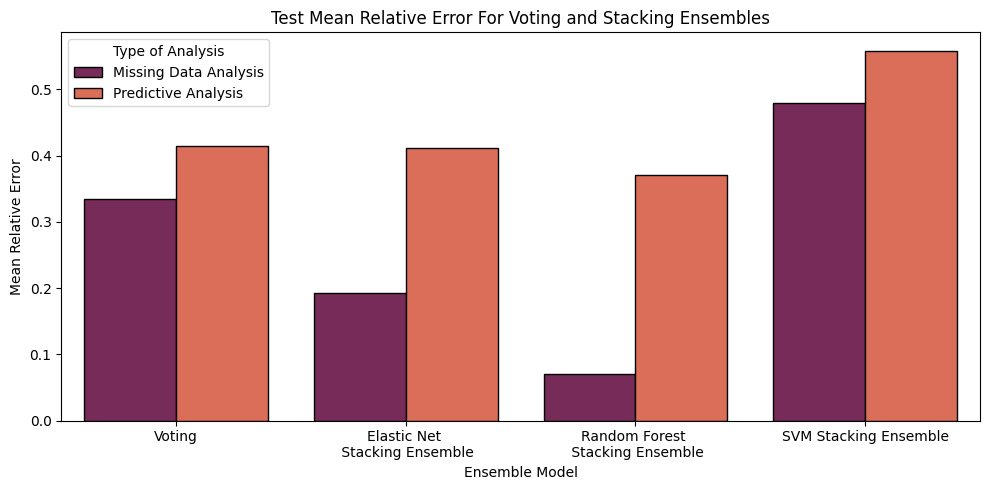

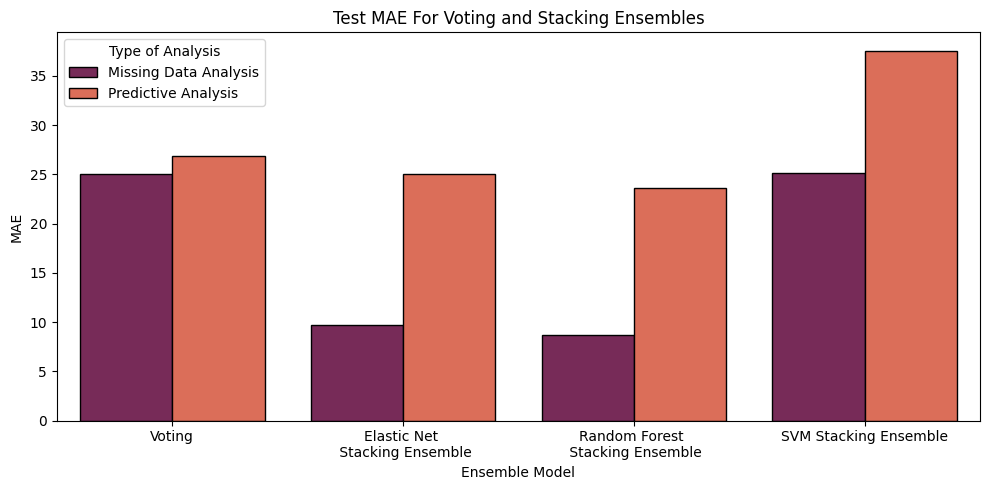

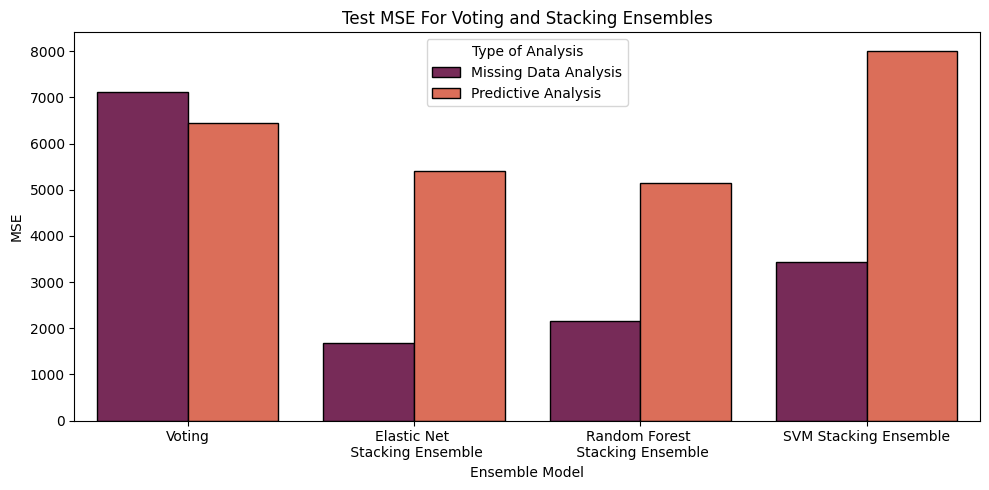

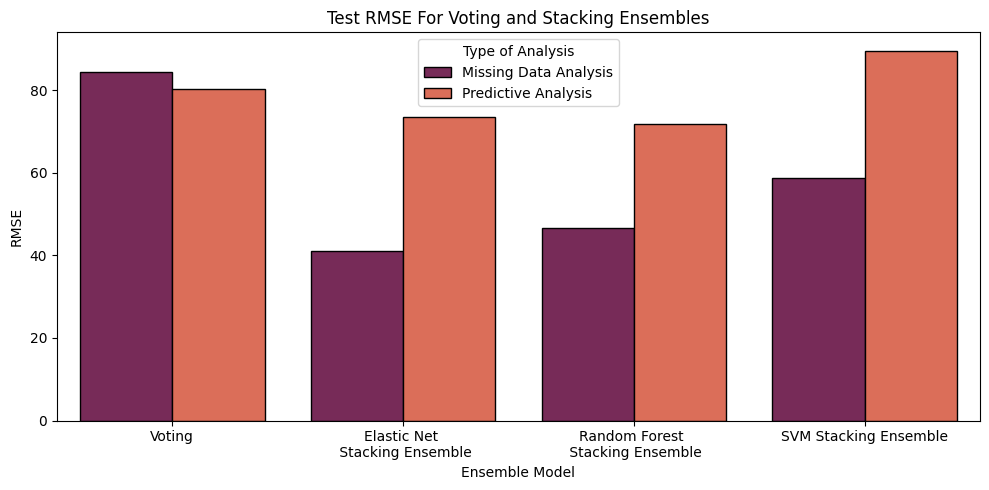

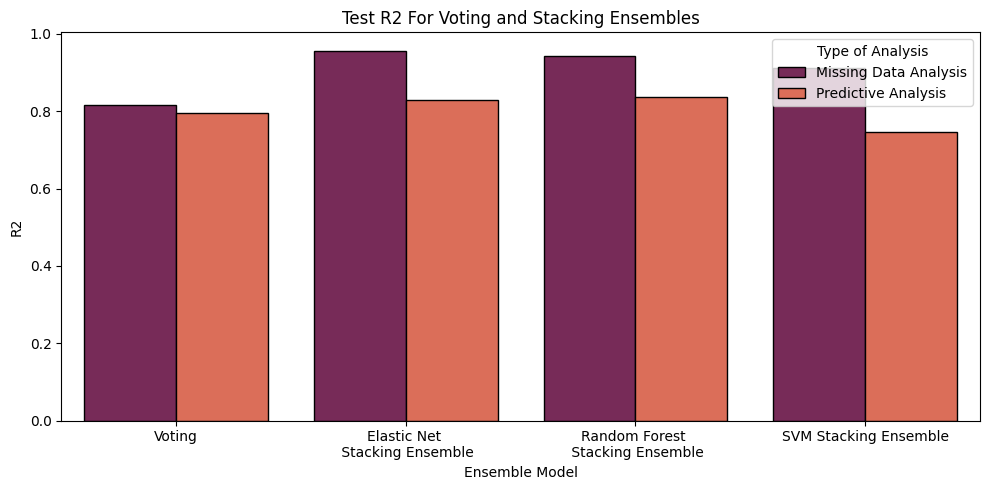

In [130]:
color_map = {'income': 'blue','year': 'purple'}
metrics = ['Relative Error', 'MAE', "MSE", 'RMSE', "R2"]

for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(
        data=test_stats[test_stats['Metric'] == metric],
        x='index',
        y='Value',
        hue='Type of Analysis',
        palette='rocket',  # You can also use your own color_map
        edgecolor='black'
    )
    
    if metric == 'Relative Error':
        metric_name = 'Mean Relative Error'
    else: metric_name = metric

    plt.title("Test " + metric_name + " For Voting and Stacking Ensembles")
    plt.xlabel("Ensemble Model")
    plt.ylabel(metric_name)
    #plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.show()

### Base Estimator Importance

In [132]:
normalised_bp_year = joblib.load("../split_year_models/ensemble/voting_normalised_best_params.pkl")
best_linreg_model_year = joblib.load("../split_year_models/ensemble/linreg_stacking_best_model.pkl")
best_rf_model_year = joblib.load("../split_year_models/ensemble/rf_stacking_best_model.pkl")

In [133]:
normalised_bp_income = joblib.load("../split_income_models/ensemble/voting_normalised_best_params.pkl")
best_linreg_model_income = joblib.load("../split_income_models/ensemble/linreg_stacking_best_model.pkl")
best_rf_model_income = joblib.load("../split_income_models/ensemble/rf_stacking_best_model.pkl")

In [134]:
feature_imp_rf_year = best_rf_model_year.feature_importances_
feature_imp_rf_income = best_rf_model_income.feature_importances_

In [166]:
imp_year = pd.DataFrame({'Model': range(len(feature_imp_rf_year)),
'Importance': feature_imp_rf_year}).sort_values(by='Importance', ascending=False)

imp_year.head(10)

Model  Importance
241    241    0.130124
254    254    0.080158
40      40    0.077809
232    232    0.076628
243    243    0.074525
43      43    0.053762
20      20    0.050880
215    215    0.031732
213    213    0.031410
231    231    0.030865

In [164]:
imp_inc = pd.DataFrame({'Model': range(len(feature_imp_rf_income)),
'Importance': feature_imp_rf_income}).sort_values(by='Importance', ascending=False)

imp_inc.head(10)

Model  Importance
206    206    0.255079
232    232    0.137341
252    252    0.099981
255    255    0.062386
236    236    0.058440
36      36    0.051941
259    259    0.032869
225    225    0.030107
258    258    0.029509
221    221    0.029482

### Base Estimator Effect 

In [ ]:
test_perm_year_all = joblib.load("../split_year_models/ensemble/models_test_perm_values.pkl")
test_perm_inc_all = joblib.load("../split_income_models/ensemble/models_test_perm_values.pkl")

In [169]:
test_perm_year_all

MSE        MAE        R2  \
LGBM Only                          4729.263771  23.416725  0.850381   
XGB Only                           5409.124106  24.195998  0.828872   
Random Forest Only                 5313.282078  24.008986  0.831904   
All Base Predictors                5134.177722  23.653452  0.837571   
Randomly Permuted Base Predictors  6063.232967  26.327175  0.808178   

                                        RMSE Relative Error  
LGBM Only                          68.769643        0.38618  
XGB Only                           73.546748       0.372738  
Random Forest Only                 72.892263       0.368854  
All Base Predictors                71.653177       0.370776  
Randomly Permuted Base Predictors  77.866764       0.390708

In [170]:
test_perm_inc_all

MSE        MAE        R2  \
LGBM Only                          4684.583277  13.822188  0.878079   
XGB Only                           2073.702582   8.007281   0.94603   
Random Forest Only                 3324.017324  11.443789  0.913489   
All Base Predictors                2160.906806   8.683495   0.94376   
Randomly Permuted Base Predictors  2187.961865   8.775227  0.943056   

                                        RMSE Relative Error  
LGBM Only                          68.444016       0.142669  
XGB Only                           45.537925       0.066688  
Random Forest Only                 57.654291        0.11471  
All Base Predictors                46.485555       0.069516  
Randomly Permuted Base Predictors  46.775655       0.069781

In [145]:
test_perm_year = test_perm_year_all[:-1]
test_perm_inc = test_perm_inc_all[:-1]

In [151]:
test_perm_inc['Type of Analysis'] = 'Missing Data \n Analysis'
test_perm_inc.index = ['LightGBM Base \n Estimators Only', 'XGBoost Base \n Estimators Only', 'Random Forest \n Base Estimators Only', 'All Base Estimators']
test_perm_year['Type of Analysis'] = 'Predictive \n Analysis'
test_perm_year.index = ['LightGBM Base \n Estimators Only', 'XGBoost Base \n Estimators Only', 'Random Forest \n Base Estimators Only', 'All Base Estimators']
test_perm = pd.concat([test_perm_inc, test_perm_year])
test_perm = test_perm.reset_index()
test_perm = test_perm.melt(id_vars=['index', 'Type of Analysis'], var_name='Metric', value_name='Value')

/var/folders/jd/0gmk2m5x1cl2hh0v_hsx43q40000gn/T/ipykernel_16753/2997312094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_perm_inc['Type of Analysis'] = 'Missing Data \n Analysis'
/var/folders/jd/0gmk2m5x1cl2hh0v_hsx43q40000gn/T/ipykernel_16753/2997312094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_perm_year['Type of Analysis'] = 'Predictive \n Analysis'


In [153]:
test_perm[test_perm['Metric'] == 'Relative Error']

index          Type of Analysis  \
32       LightGBM Base \n Estimators Only  Missing Data \n Analysis   
33        XGBoost Base \n Estimators Only  Missing Data \n Analysis   
34  Random Forest \n Base Estimators Only  Missing Data \n Analysis   
35                    All Base Estimators  Missing Data \n Analysis   
36       LightGBM Base \n Estimators Only    Predictive \n Analysis   
37        XGBoost Base \n Estimators Only    Predictive \n Analysis   
38  Random Forest \n Base Estimators Only    Predictive \n Analysis   
39                    All Base Estimators    Predictive \n Analysis   

            Metric     Value  
32  Relative Error  0.142669  
33  Relative Error  0.066688  
34  Relative Error   0.11471  
35  Relative Error  0.069516  
36  Relative Error   0.38618  
37  Relative Error  0.372738  
38  Relative Error  0.368854  
39  Relative Error  0.370776

In [154]:
test_perm[test_perm['Metric'] == 'MSE']

index          Type of Analysis Metric  \
0       LightGBM Base \n Estimators Only  Missing Data \n Analysis    MSE   
1        XGBoost Base \n Estimators Only  Missing Data \n Analysis    MSE   
2  Random Forest \n Base Estimators Only  Missing Data \n Analysis    MSE   
3                    All Base Estimators  Missing Data \n Analysis    MSE   
4       LightGBM Base \n Estimators Only    Predictive \n Analysis    MSE   
5        XGBoost Base \n Estimators Only    Predictive \n Analysis    MSE   
6  Random Forest \n Base Estimators Only    Predictive \n Analysis    MSE   
7                    All Base Estimators    Predictive \n Analysis    MSE   

         Value  
0  4684.583277  
1  2073.702582  
2  3324.017324  
3  2160.906806  
4  4729.263771  
5  5409.124106  
6  5313.282078  
7  5134.177722

In [158]:
5134.177722 - 4729.263771

404.91395100000045

In [155]:
(5134.177722 - 4729.263771)/5134.177722

0.07886636827255518

In [157]:
(2160.906806 - 2073.702582)/2160.906806

0.040355384025756114

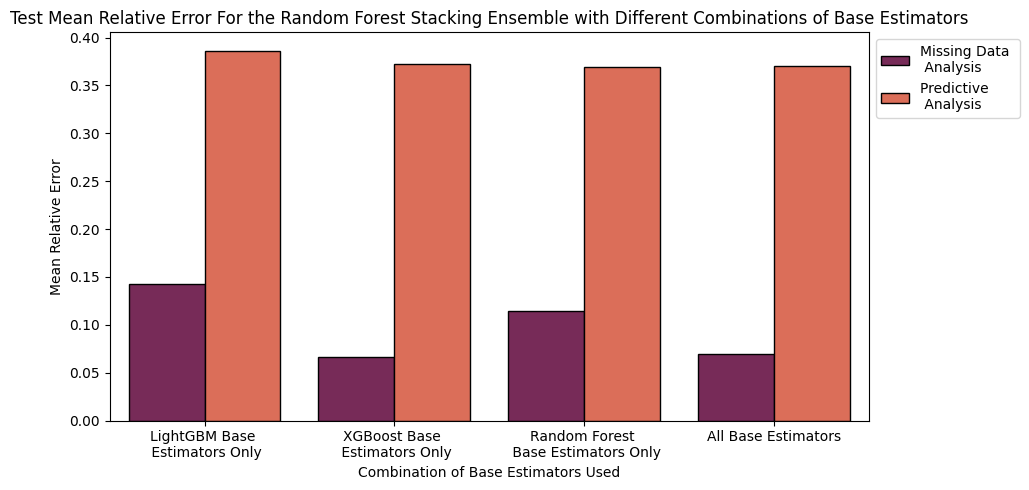

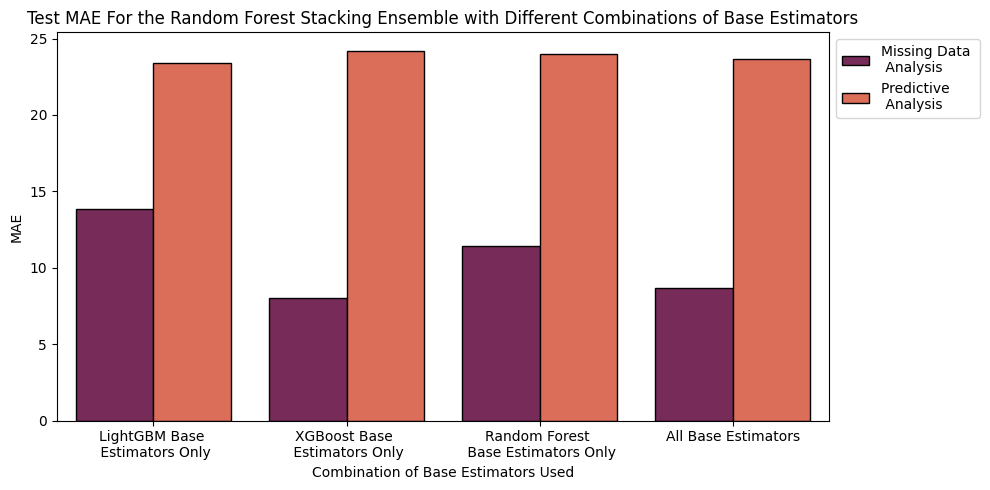

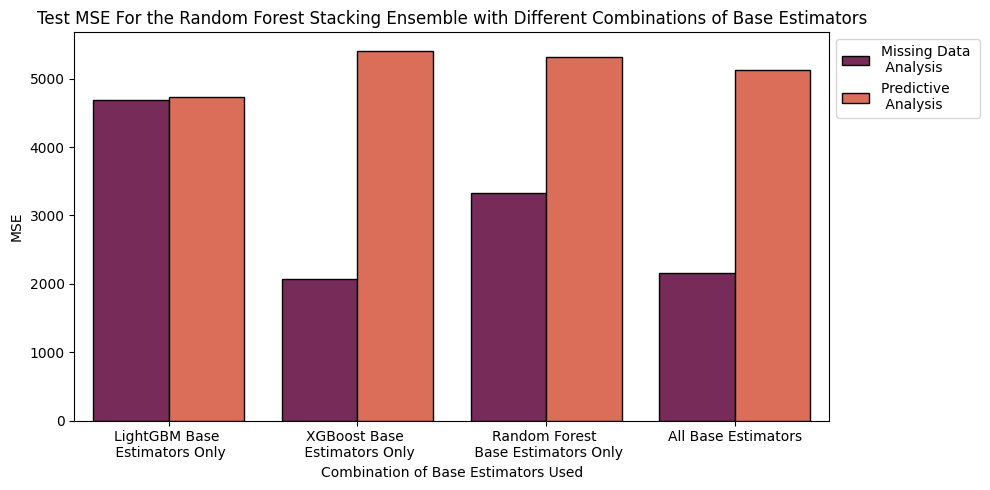

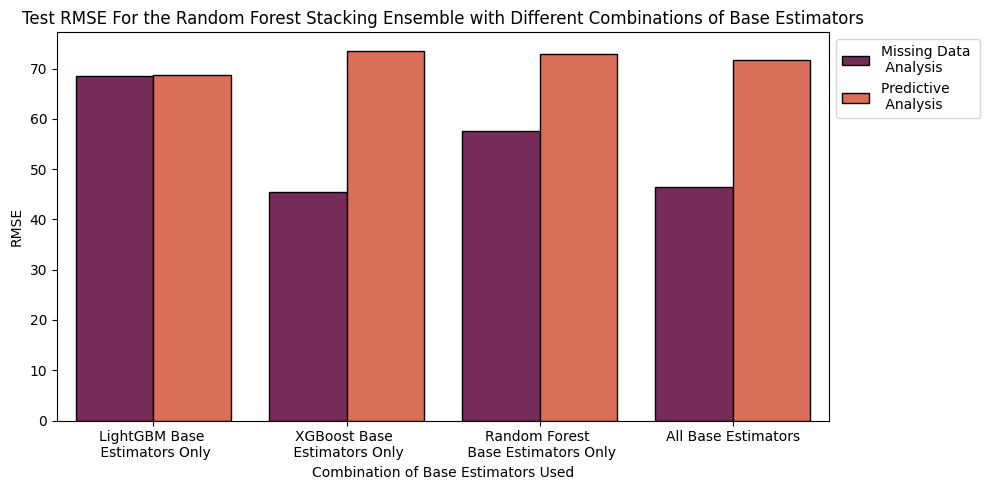

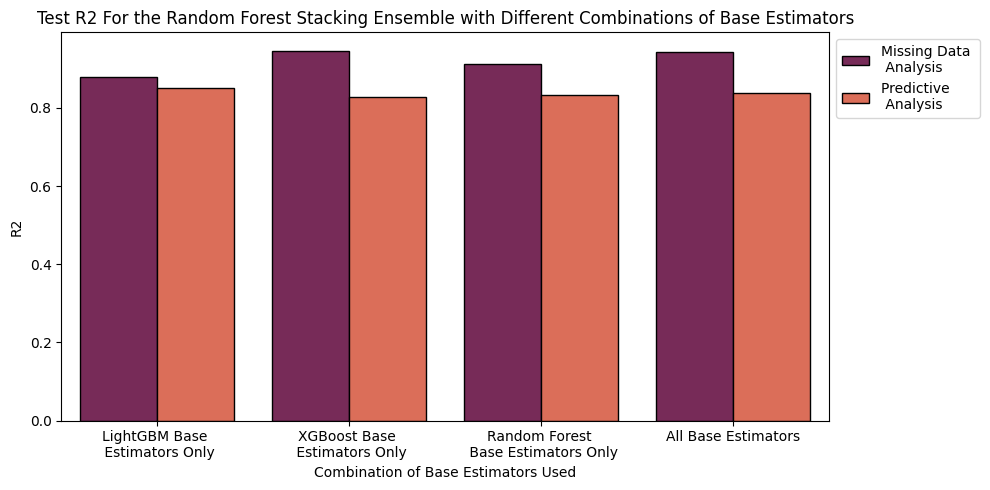

In [152]:
color_map = {'income': 'blue','year': 'purple'}
metrics = ['Relative Error', 'MAE', "MSE", 'RMSE', "R2"]

for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(
        data= test_perm[test_perm['Metric'] == metric],
        x='index',
        y='Value',
        hue='Type of Analysis',
        palette='rocket',  # You can also use your own color_map
        edgecolor='black'
    )
    
    if metric == 'Relative Error':
        metric_name = 'Mean Relative Error'
    else: metric_name = metric

    plt.title("Test " + metric_name + " For the Random Forest Stacking Ensemble with Different Combinations of Base Estimators")
    plt.xlabel("Combination of Base Estimators Used")
    plt.ylabel(metric_name)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.tight_layout()
    plt.show()

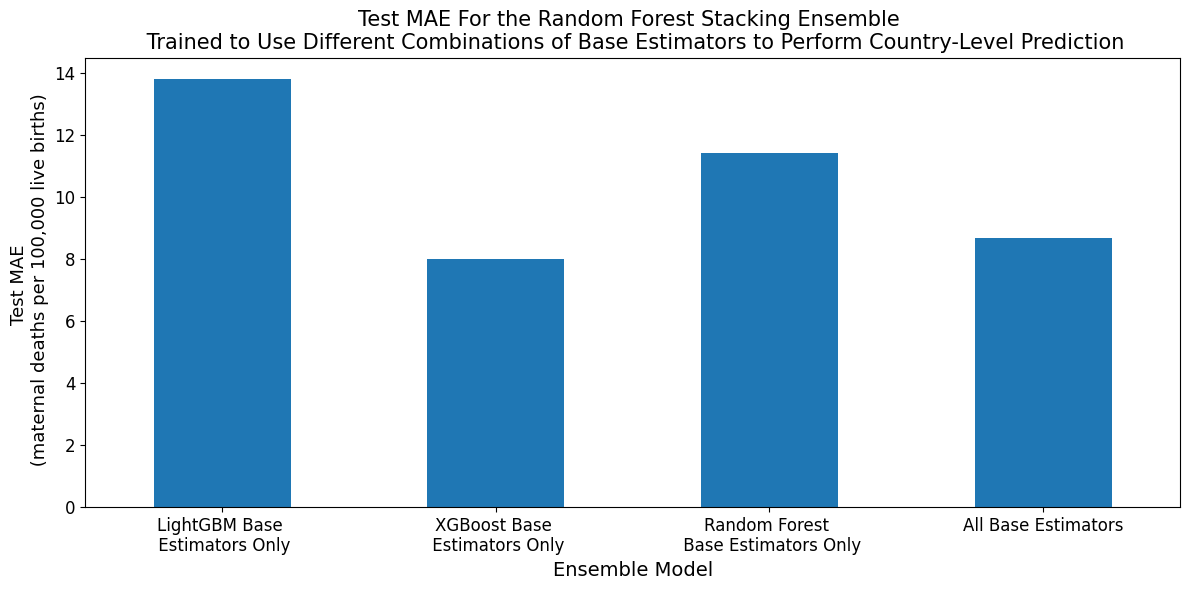

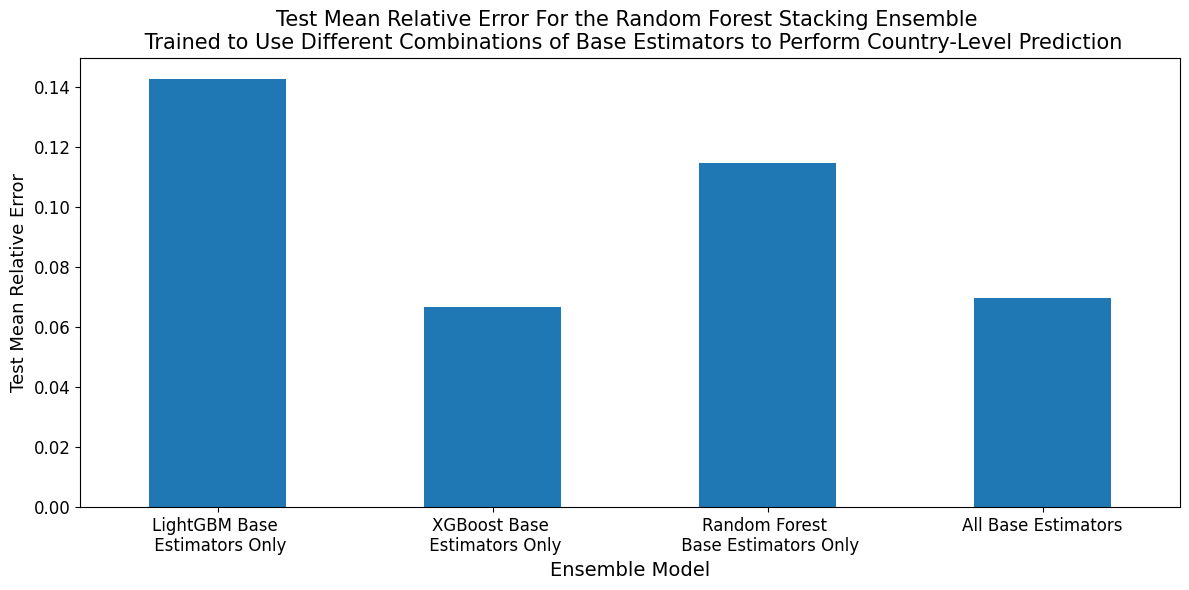

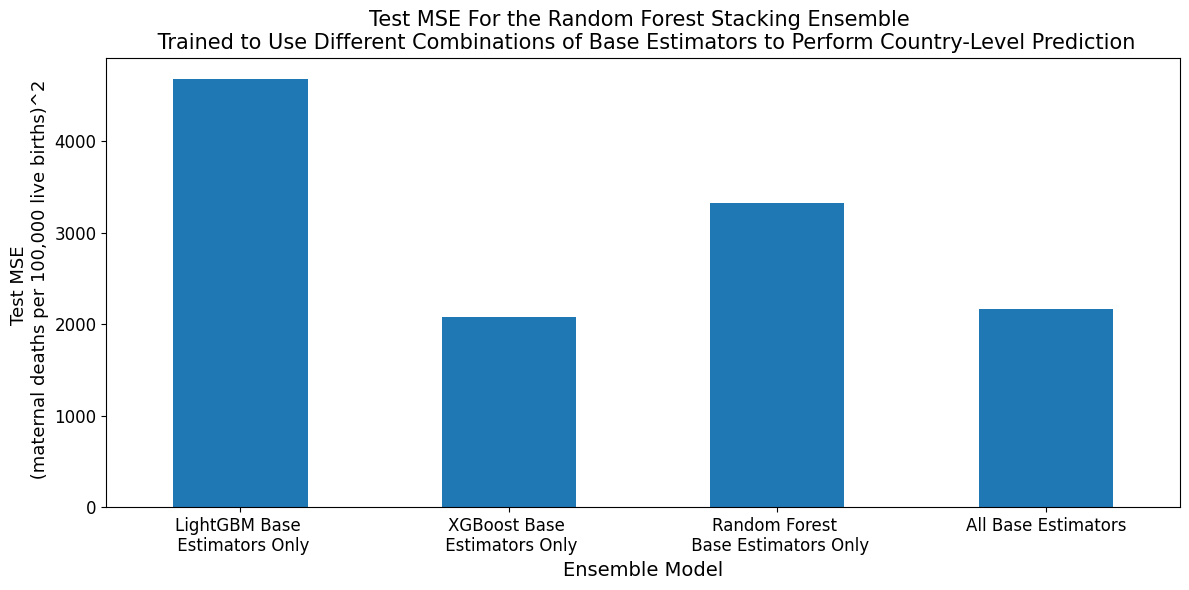

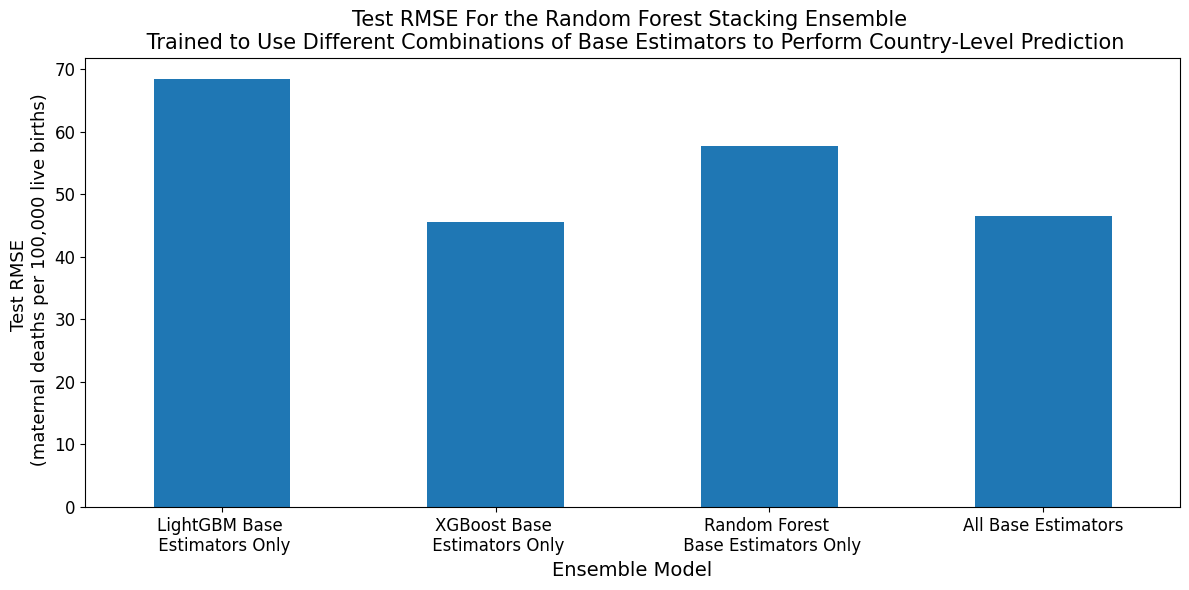

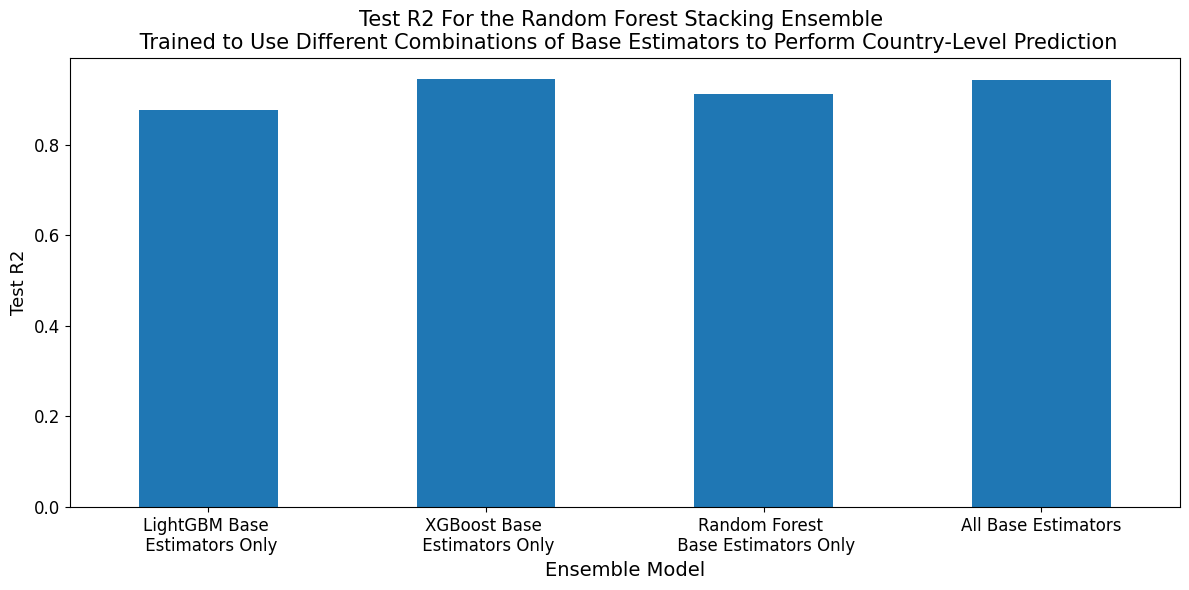

In [652]:
for metric in ['MAE', 'Relative Error', 'MSE', 'RMSE', 'R2']:
    mean_vals = test_perm_inc[metric]

    mean_vals.plot.bar(figsize=(12, 6), rot=0, capsize=3)
    if metric == 'Relative Error':
        metric_title = 'Mean Relative Error'
        metric_name = metric_title
    elif metric == 'MAE':
        metric_title = metric
        metric_name = 'MAE \n (maternal deaths per 100,000 live births)'
    elif metric == 'RMSE':
        metric_title = metric
        metric_name = 'RMSE \n (maternal deaths per 100,000 live births)'
    elif metric == 'MSE':
        metric_title = metric
        metric_name = 'MSE \n (maternal deaths per 100,000 live births)^2'
    else:
        metric_title = metric
        metric_name = metric

    plt.title("Test " + metric_title + " For the Random Forest Stacking Ensemble \n Trained to Use Different Combinations of Base Estimators to Perform Country-Level Prediction", fontsize=15)
    plt.xlabel("Ensemble Model", fontsize=14)
    plt.ylabel('Test ' + metric_name, fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

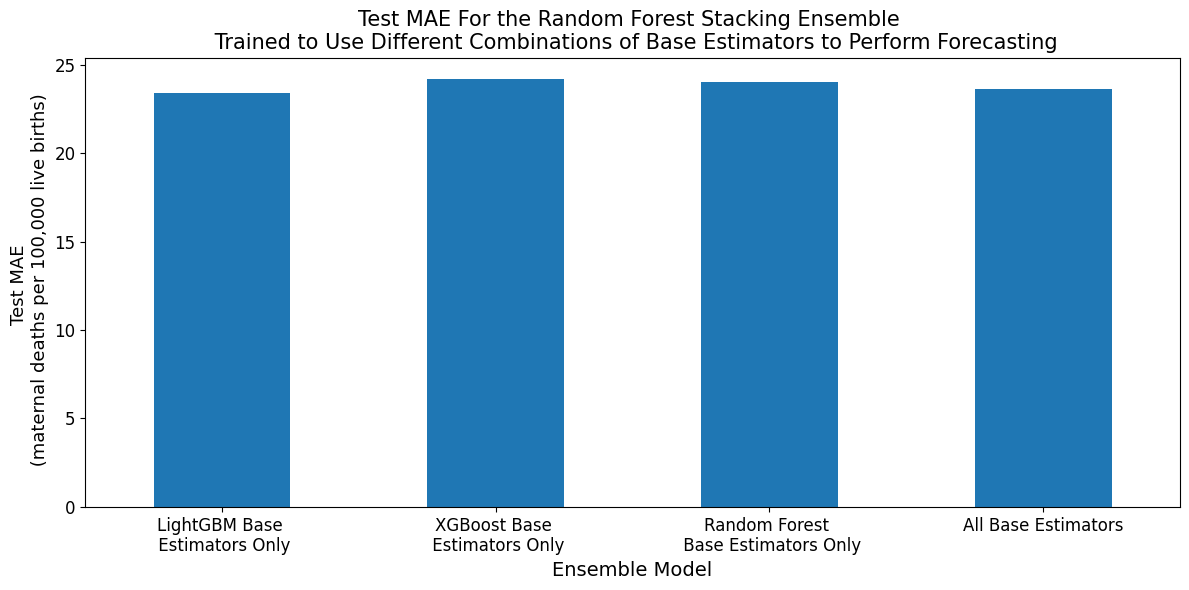

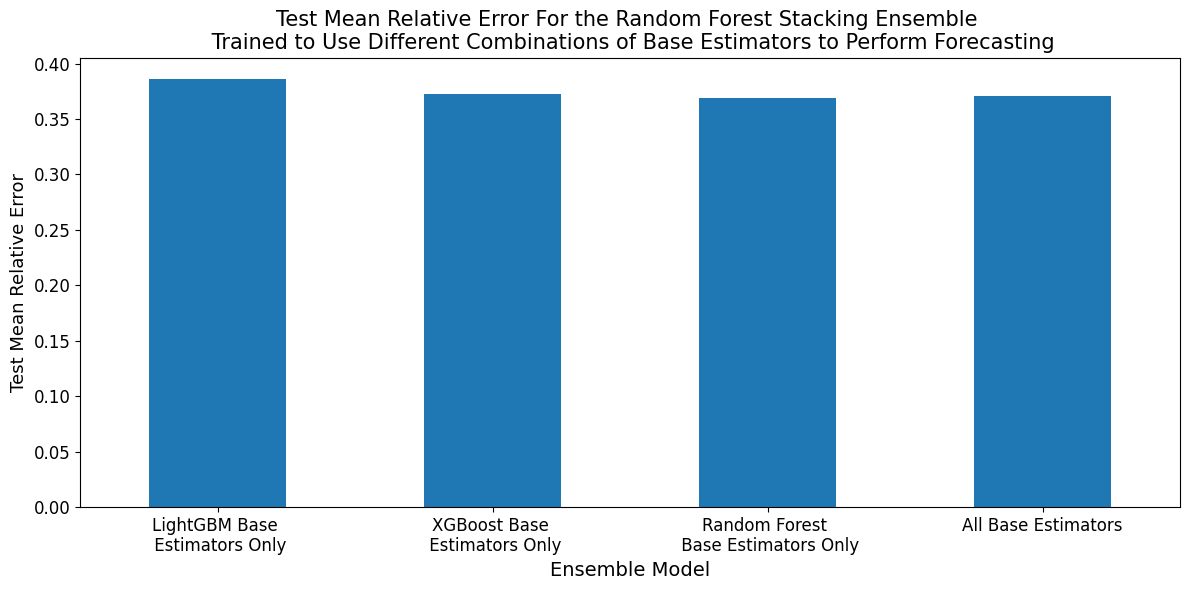

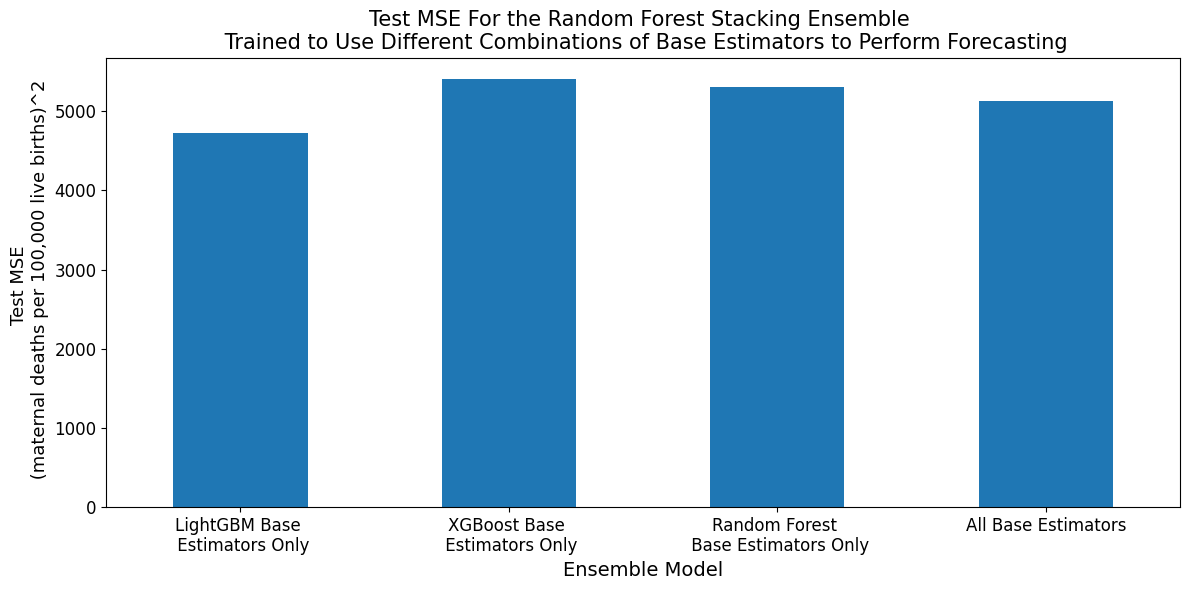

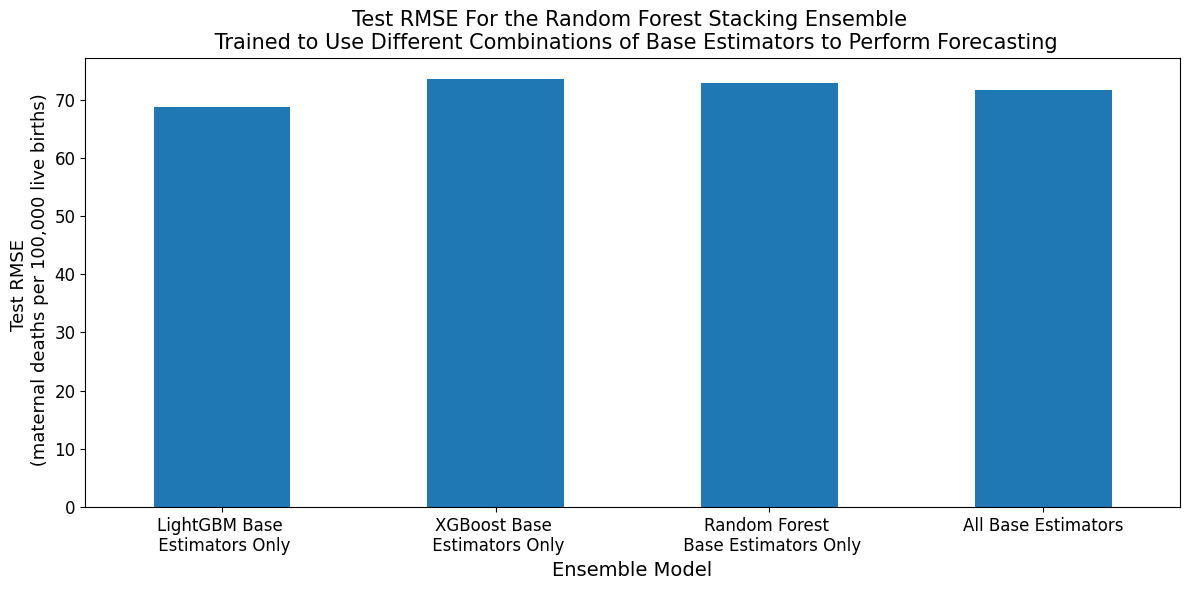

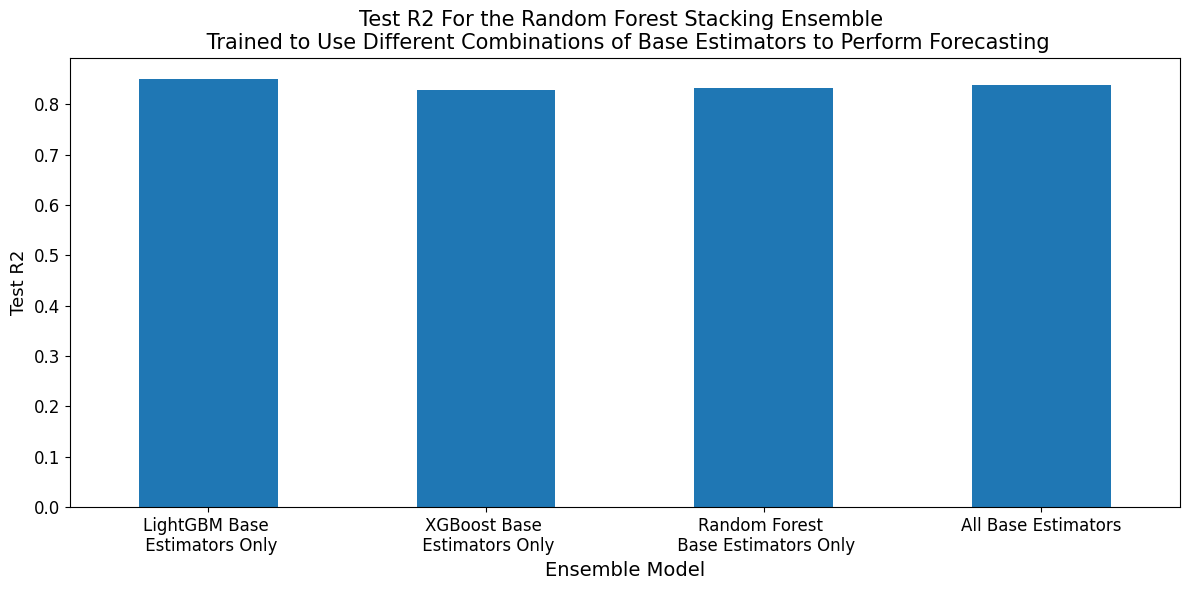

In [653]:
for metric in ['MAE', 'Relative Error', 'MSE', 'RMSE', 'R2']:
    mean_vals = test_perm_year[metric]

    mean_vals.plot.bar(figsize=(12, 6), rot=0, capsize=3)
    if metric == 'Relative Error':
        metric_title = 'Mean Relative Error'
        metric_name = metric_title
    elif metric == 'MAE':
        metric_title = metric
        metric_name = 'MAE \n (maternal deaths per 100,000 live births)'
    elif metric == 'RMSE':
        metric_title = metric
        metric_name = 'RMSE \n (maternal deaths per 100,000 live births)'
    elif metric == 'MSE':
        metric_title = metric
        metric_name = 'MSE \n (maternal deaths per 100,000 live births)^2'
    else:
        metric_title = metric
        metric_name = metric

    plt.title("Test " + metric_title + " For the Random Forest Stacking Ensemble \n Trained to Use Different Combinations of Base Estimators to Perform Forecasting", fontsize=15)
    plt.xlabel("Ensemble Model", fontsize=14)
    plt.ylabel('Test ' + metric_name, fontsize=13)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

### Extra

## Prediction Error

### country level

In [667]:
rf_inc = joblib.load("../split_income_models/ensemble/rf_stacking_best_model.pkl")
stacked_test_predictions_inc = joblib.load('../split_income_models/ensemble/stacked_test_predictions.pkl')
test_pred_inc = rf_inc.predict(stacked_test_predictions_inc)
test_data_y = pd.read_csv('../data_with_yearcountry/income' + '/test/y_test.csv')
test_data_y = test_data_y.drop(columns=['Unnamed: 0'], axis=1)
test_data_x = pd.read_csv('../data_with_yearcountry/income' + '/test/x_test.csv')
test_data_x = test_data_x.drop(columns=['Unnamed: 0'], axis=1)

In [668]:
income_errors = pd.DataFrame(columns=['income level', 'predictive error', 'dataset'])
income_mse = pd.DataFrame(columns=['income level', 'predictive error', 'dataset'])

In [669]:
num_test_predictions = len(test_pred_inc)
for p in range(0, num_test_predictions):
    income = test_data_x['income_num'].iloc[p]
    if income == 1:
        income_level = 'Low'
    elif income == 2:
        income_level = 'Lower-Middle'
    elif income == 3:
        income_level = 'Upper-Middle'
    elif income == 4:
        income_level = 'High'

    mape = np.abs(test_pred_inc[p] - test_data_y.iloc[p]) / np.maximum(np.abs(test_pred_inc[p]), np.abs(test_data_y.iloc[p]))
    income_errors.loc[len(income_errors)] = [income_level, mape.item(), 'test']


In [ ]:
train_X_income = joblib.load('../split_income_models/ensemble/X_meta_train.pkl')
val_X_income = joblib.load('../split_income_models/ensemble/X_meta_val.pkl')
train_y_income = joblib.load('../split_income_models/ensemble/y_meta_train.pkl')
val_y_income = joblib.load('../split_income_models/ensemble/y_meta_val.pkl')
train_pred_inc = rf_inc.predict(train_X_income)
val_pred_inc = rf_inc.predict(val_X_income)

In [251]:
train_val = pd.read_csv('../split_income_data/train_val.csv')
train_val = train_val.drop(columns=['Unnamed: 0'], axis=1)
train_val_input = train_val.drop(columns=['Maternal mortality ratio (national estimate, per 100,000 live births)'], axis=1)

In [256]:
train_x_inx = train_val_input.loc[train_y_income.index]
val_x_inx = train_val_input.loc[val_y_income.index]

In [232]:
from sklearn.metrics import mean_squared_error

In [670]:
num_train_predictions = len(train_pred_inc)
for p in range(0, num_train_predictions):
    income = train_x_inx['income_num'].iloc[p]
    if income == 1:
        income_level = 'Low'
    elif income == 2:
        income_level = 'Lower-Middle'
    elif income == 3:
        income_level = 'Upper-Middle'
    elif income == 4:
        income_level = 'High'

    mape = np.abs(train_pred_inc[p] - train_y_income.iloc[p]) / np.maximum(np.abs(train_pred_inc[p]), np.abs(train_y_income.iloc[p]))
    income_errors.loc[len(income_errors)] = [income_level, mape.item(), 'train']

/var/folders/jd/0gmk2m5x1cl2hh0v_hsx43q40000gn/T/ipykernel_16753/376811120.py:13: RuntimeWarning: invalid value encountered in scalar divide
  mape = np.abs(train_pred_inc[p] - train_y_income.iloc[p]) / np.maximum(np.abs(train_pred_inc[p]), np.abs(train_y_income.iloc[p]))
/var/folders/jd/0gmk2m5x1cl2hh0v_hsx43q40000gn/T/ipykernel_16753/376811120.py:13: RuntimeWarning: invalid value encountered in scalar divide
  mape = np.abs(train_pred_inc[p] - train_y_income.iloc[p]) / np.maximum(np.abs(train_pred_inc[p]), np.abs(train_y_income.iloc[p]))
/var/folders/jd/0gmk2m5x1cl2hh0v_hsx43q40000gn/T/ipykernel_16753/376811120.py:13: RuntimeWarning: invalid value encountered in scalar divide
  mape = np.abs(train_pred_inc[p] - train_y_income.iloc[p]) / np.maximum(np.abs(train_pred_inc[p]), np.abs(train_y_income.iloc[p]))
/var/folders/jd/0gmk2m5x1cl2hh0v_hsx43q40000gn/T/ipykernel_16753/376811120.py:13: RuntimeWarning: invalid value encountered in scalar divide
  mape = np.abs(train_pred_inc[p] - trai

In [671]:
num_val_predictions = len(val_pred_inc)
for p in range(0, num_val_predictions):
    income = val_x_inx['income_num'].iloc[p]
    if income == 1:
        income_level = 'Low'
    elif income == 2:
        income_level = 'Lower-Middle'
    elif income == 3:
        income_level = 'Upper-Middle'
    elif income == 4:
        income_level = 'High'

    mape = np.abs(val_pred_inc[p] - val_y_income.iloc[p]) / np.maximum(np.abs(val_pred_inc[p]), np.abs(val_y_income.iloc[p]))
    income_errors.loc[len(income_errors)] = [income_level, mape.item(), 'val']

/var/folders/jd/0gmk2m5x1cl2hh0v_hsx43q40000gn/T/ipykernel_16753/3535903822.py:13: RuntimeWarning: invalid value encountered in scalar divide
  mape = np.abs(val_pred_inc[p] - val_y_income.iloc[p]) / np.maximum(np.abs(val_pred_inc[p]), np.abs(val_y_income.iloc[p]))
/var/folders/jd/0gmk2m5x1cl2hh0v_hsx43q40000gn/T/ipykernel_16753/3535903822.py:13: RuntimeWarning: invalid value encountered in scalar divide
  mape = np.abs(val_pred_inc[p] - val_y_income.iloc[p]) / np.maximum(np.abs(val_pred_inc[p]), np.abs(val_y_income.iloc[p]))
/var/folders/jd/0gmk2m5x1cl2hh0v_hsx43q40000gn/T/ipykernel_16753/3535903822.py:13: RuntimeWarning: invalid value encountered in scalar divide
  mape = np.abs(val_pred_inc[p] - val_y_income.iloc[p]) / np.maximum(np.abs(val_pred_inc[p]), np.abs(val_y_income.iloc[p]))
/var/folders/jd/0gmk2m5x1cl2hh0v_hsx43q40000gn/T/ipykernel_16753/3535903822.py:13: RuntimeWarning: invalid value encountered in scalar divide
  mape = np.abs(val_pred_inc[p] - val_y_income.iloc[p]) / np

In [672]:
income_errors['dataset'] =income_errors['dataset'].map({
    'train': 'Train',
    'val': 'Validation',
    'test': 'Test'
})

In [679]:
income_errors

income level  predictive error     dataset
0             High          0.000537        Test
1             High          0.000372        Test
2     Upper-Middle          0.459525        Test
3             High          0.491267        Test
4     Upper-Middle          0.002268        Test
...            ...               ...         ...
2794  Lower-Middle          0.041818  Validation
2795          High          0.033396  Validation
2796  Upper-Middle          0.000326  Validation
2797          High          0.001206  Validation
2798  Upper-Middle          0.003623  Validation

[2799 rows x 3 columns]

In [680]:
income_errors_mean = income_errors.groupby(['income level', 'dataset']).mean()

In [684]:
income_errors.groupby(['income level', 'dataset']).std()

predictive error
income level dataset                     
High         Test                0.148737
             Train               0.173001
             Validation          0.173713
Low          Test                0.215244
             Train               0.033735
             Validation          0.035162
Lower-Middle Test                0.027570
             Train               0.075448
             Validation          0.043448
Upper-Middle Test                0.155801
             Train               0.175981
             Validation          0.203115

In [682]:
income_errors_mean

predictive error
income level dataset                     
High         Test                0.067628
             Train               0.047411
             Validation          0.047547
Low          Test                0.180472
             Train               0.038942
             Validation          0.028931
Lower-Middle Test                0.016615
             Train               0.029790
             Validation          0.026592
Upper-Middle Test                0.082371
             Train               0.056720
             Validation          0.074920

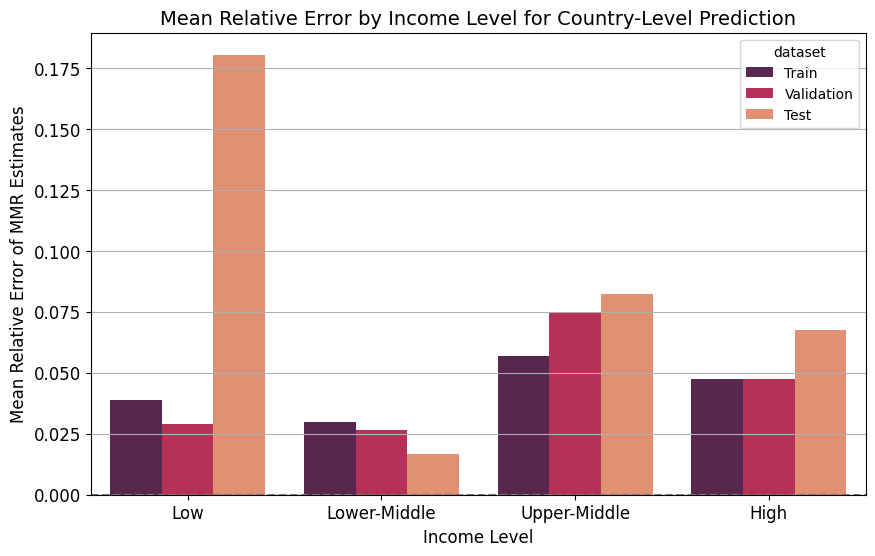

In [681]:
plt.figure(figsize=(10, 6))
sns.barplot(x='income level', y='predictive error', data=income_errors_mean, hue = 'dataset', palette='rocket', order=['Low', 'Lower-Middle', 'Upper-Middle', 'High'], hue_order=['Train', 'Validation', 'Test'])
plt.axhline(0, color='gray', linestyle='--')
plt.title("Mean Relative Error by Income Level for Country-Level Prediction", fontsize = 14)
plt.ylabel("Mean Relative Error of MMR Estimates", fontsize = 12)
plt.xlabel("Income Level", fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.show()

In [ ]:

Income Level	Number of Samples	Proportion of Samples Remaining (%)
	Before Removing Samples with MMR Missing	After Removing Samples with MMR Missing	
Low	884	78	8.8
Lower-Middle	1734	310	17.88
Upper-Middle	1802	996	55
High	2176	1405	65


In [698]:
78+310+996+1405

2789

In [ ]:
(884+1734+1802+2176)

6596

In [370]:
test_for_mse_inc = pd.concat([pd.DataFrame(test_pred_inc), pd.DataFrame(test_data_x['income_num'])], axis=1)
test_for_mse_inc = pd.concat([test_for_mse_inc, pd.DataFrame(test_data_y)], axis=1)
test_for_mse_inc['squared error'] = (test_for_mse_inc[0] - test_for_mse_inc['Maternal mortality ratio (national estimate, per 100,000 live births)'])**2

train_for_mse_inc = pd.concat([pd.DataFrame(train_pred_inc), pd.DataFrame(train_x_inx['income_num'])], axis=1)
train_for_mse_inc = pd.concat([train_for_mse_inc, pd.DataFrame(train_y_income)], axis=1)
train_for_mse_inc['squared error'] = (train_for_mse_inc[0] - train_for_mse_inc['Maternal mortality ratio (national estimate, per 100,000 live births)'])**2

val_for_mse_inc = pd.concat([pd.DataFrame(val_pred_inc), pd.DataFrame(val_x_inx['income_num'])], axis=1)
val_for_mse_inc = pd.concat([val_for_mse_inc, pd.DataFrame(val_y_income)], axis=1)
val_for_mse_inc['squared error'] = (val_for_mse_inc[0] - val_for_mse_inc['Maternal mortality ratio (national estimate, per 100,000 live births)'])**2

In [371]:
income_mse_df = pd.concat([train_for_mse_inc.groupby('income_num')['squared error'].mean()**0.5, val_for_mse_inc.groupby('income_num')['squared error'].mean()**0.5], axis=1)
income_mse_df = pd.concat([income_mse_df, test_for_mse_inc.groupby('income_num')['squared error'].mean()**0.5], axis=1)

In [372]:
income_mse_df.columns = ['train', 'validation', 'test']
income_mse_df

train  validation        test
income_num                                    
1.0         751.425707  692.072464  249.265381
2.0         328.269731  329.941935   18.917472
3.0         171.751000  120.732417   12.294314
4.0         183.127398  151.424023    2.431700

In [373]:
train_for_mse_inc['dataset'] = 'Train'
val_for_mse_inc['dataset'] = 'Validation'
test_for_mse_inc['dataset'] = 'Test'

In [374]:
income_mse_df = pd.concat([train_for_mse_inc[['squared error', 'income_num', 'dataset']], val_for_mse_inc[['squared error', 'income_num', 'dataset']]], axis=0)
income_mse_df = pd.concat([income_mse_df, test_for_mse_inc[['squared error', 'income_num', 'dataset']]], axis=0)

In [375]:
income_mse_df = income_mse_df.reset_index(drop=True)

In [405]:
colors = sns.color_palette("rocket", 4)

# The first one is the pale color
pale_color = colors[0]
print("Pale color (RGB):", pale_color)

Pale color (RGB): (0.29977678, 0.11356089, 0.29254823)


In [417]:
test_for_mse_inc.groupby(['income_num', 'dataset']).mean()

0  \
income_num dataset               
1.0        Test     886.280193   
2.0        Test     188.643455   
3.0        Test      42.607163   
4.0        Test      15.956818   

                    Maternal mortality ratio (national estimate, per 100,000 live births)  \
income_num dataset                                                                          
1.0        Test                                            797.500000                       
2.0        Test                                            193.073171                       
3.0        Test                                             40.423077                       
4.0        Test                                             16.360544                       

                    squared error  
income_num dataset                 
1.0        Test      62133.230332  
2.0        Test        357.870743  
3.0        Test        151.150156  
4.0        Test          5.913165

In [418]:
62133**0.5

249.26491931276652

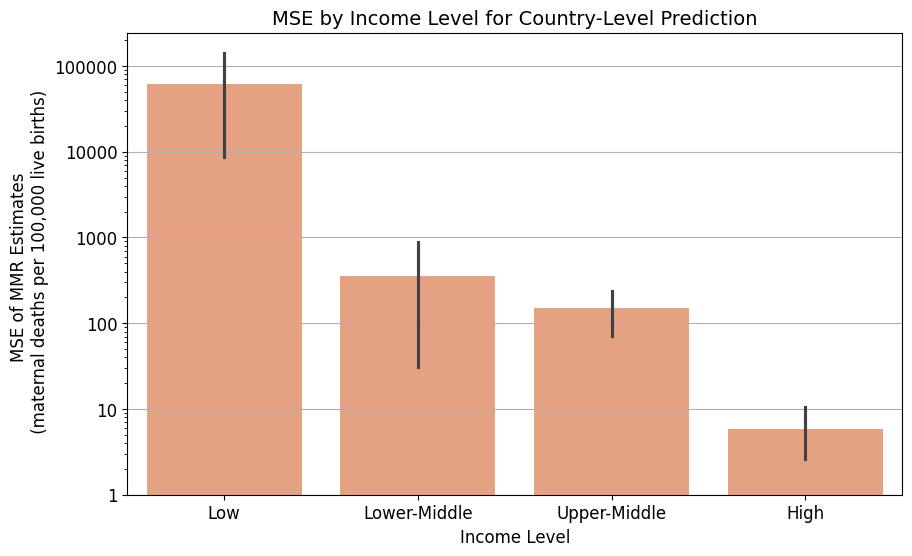

In [600]:
plt.figure(figsize=(10, 6))
sns.barplot(x='income_num', y='squared error', data=test_for_mse_inc, color=colors[-1])
plt.axhline(0, color='gray', linestyle='--')
plt.title("MSE by Income Level for Country-Level Prediction", fontsize = 14)
plt.ylabel("MSE of MMR Estimates \n (maternal deaths per 100,000 live births)", fontsize = 12)
plt.xlabel("Income Level", fontsize = 12)
plt.xticks(fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Low", "Lower-Middle", "Upper-Middle", "High"])
plt.yticks(fontsize=12)
plt.yscale('log')
plt.yticks(ticks=[1, 10, 100, 1000, 10000, 100000], labels=[1, 10, 100, 1000, 10000, 100000])
plt.grid(axis='y')
plt.show()

## forecasting

#### Data Collection

In [685]:
pred_error_year = joblib.load("../sensitivity_analysis/ensemble/year/prediction_error_inclevel.pkl")

In [686]:
rf_year = joblib.load("../split_year_models/ensemble/rf_stacking_best_model.pkl")
stacked_test_predictions_year = joblib.load('../split_year_models/ensemble/stacked_test_predictions.pkl')
test_pred_year = rf_year.predict(stacked_test_predictions_year)
test_data_y_year = pd.read_csv('../split_year_data' + '/test/y_test.csv')
test_data_y_year = test_data_y_year.drop(columns=['Unnamed: 0'], axis=1)
test_data_x_year = pd.read_csv('../split_year_data' + '/test/x_test.csv')
test_data_x_year = test_data_x_year.drop(columns=['Unnamed: 0'], axis=1)

train_X_year = joblib.load('../split_year_models/ensemble/X_meta_train.pkl')
val_X_year = joblib.load('../split_year_models/ensemble/X_meta_val.pkl')
train_y_year = joblib.load('../split_year_models/ensemble/y_meta_train.pkl')
val_y_year = joblib.load('../split_year_models/ensemble/y_meta_val.pkl')
train_pred_year = rf_year.predict(train_X_year)
val_pred_year = rf_year.predict(val_X_year)

train_val_year = pd.read_csv('../split_year_data/train_val.csv')
train_val_year = train_val_year.drop(columns=['Unnamed: 0'], axis=1)
train_val_input_year = train_val_year.drop(columns=['Maternal mortality ratio (national estimate, per 100,000 live births)'], axis=1)
train_x_year = train_val_input_year.loc[train_y_year.index]
val_x_year = train_val_input_year.loc[val_y_year.index]

In [687]:
income_errors_year = pd.DataFrame(columns=['income level', 'predictive error', 'dataset'])

In [688]:
num_test_predictions_year = len(test_pred_year)
for p in range(0, num_test_predictions_year):
    income = test_data_x_year['income_num'].iloc[p]
    if income == 1:
        income_level = 'Low'
    elif income == 2:
        income_level = 'Lower-Middle'
    elif income == 3:
        income_level = 'Upper-Middle'
    elif income == 4:
        income_level = 'High'

    mape = np.abs(test_pred_year[p] - test_data_y_year.iloc[p]) / np.maximum(np.abs(test_pred_year[p]), np.abs(test_data_y_year.iloc[p]))
    income_errors_year.loc[len(income_errors_year)] = [income_level, mape.item(), 'test']

In [689]:
num_train_predictions_year = len(train_pred_year)
for p in range(0, num_train_predictions_year):
    income = train_x_year['income_num'].iloc[p]
    if income == 1:
        income_level = 'Low'
    elif income == 2:
        income_level = 'Lower-Middle'
    elif income == 3:
        income_level = 'Upper-Middle'
    elif income == 4:
        income_level = 'High'

    mape = np.abs(train_pred_year[p] - train_y_year.iloc[p]) / np.maximum(np.abs(train_pred_year[p]), np.abs(train_y_year.iloc[p]))
    income_errors_year.loc[len(income_errors_year)] = [income_level, mape.item(), 'train']

/var/folders/jd/0gmk2m5x1cl2hh0v_hsx43q40000gn/T/ipykernel_16753/963863738.py:13: RuntimeWarning: invalid value encountered in scalar divide
  mape = np.abs(train_pred_year[p] - train_y_year.iloc[p]) / np.maximum(np.abs(train_pred_year[p]), np.abs(train_y_year.iloc[p]))
/var/folders/jd/0gmk2m5x1cl2hh0v_hsx43q40000gn/T/ipykernel_16753/963863738.py:13: RuntimeWarning: invalid value encountered in scalar divide
  mape = np.abs(train_pred_year[p] - train_y_year.iloc[p]) / np.maximum(np.abs(train_pred_year[p]), np.abs(train_y_year.iloc[p]))
/var/folders/jd/0gmk2m5x1cl2hh0v_hsx43q40000gn/T/ipykernel_16753/963863738.py:13: RuntimeWarning: invalid value encountered in scalar divide
  mape = np.abs(train_pred_year[p] - train_y_year.iloc[p]) / np.maximum(np.abs(train_pred_year[p]), np.abs(train_y_year.iloc[p]))
/var/folders/jd/0gmk2m5x1cl2hh0v_hsx43q40000gn/T/ipykernel_16753/963863738.py:13: RuntimeWarning: invalid value encountered in scalar divide
  mape = np.abs(train_pred_year[p] - train_y_y

In [690]:
num_val_predictions_year = len(val_pred_year)
for p in range(0, num_val_predictions_year):
    income = val_x_year['income_num'].iloc[p]
    if income == 1:
        income_level = 'Low'
    elif income == 2:
        income_level = 'Lower-Middle'
    elif income == 3:
        income_level = 'Upper-Middle'
    elif income == 4:
        income_level = 'High'

    mape = np.abs(val_pred_year[p] - val_y_year.iloc[p]) / np.maximum(np.abs(val_pred_year[p]), np.abs(val_y_year.iloc[p]))
    income_errors_year.loc[len(income_errors_year)] = [income_level, mape.item(), 'val']

/var/folders/jd/0gmk2m5x1cl2hh0v_hsx43q40000gn/T/ipykernel_16753/1834331813.py:13: RuntimeWarning: invalid value encountered in scalar divide
  mape = np.abs(val_pred_year[p] - val_y_year.iloc[p]) / np.maximum(np.abs(val_pred_year[p]), np.abs(val_y_year.iloc[p]))
/var/folders/jd/0gmk2m5x1cl2hh0v_hsx43q40000gn/T/ipykernel_16753/1834331813.py:13: RuntimeWarning: invalid value encountered in scalar divide
  mape = np.abs(val_pred_year[p] - val_y_year.iloc[p]) / np.maximum(np.abs(val_pred_year[p]), np.abs(val_y_year.iloc[p]))
/var/folders/jd/0gmk2m5x1cl2hh0v_hsx43q40000gn/T/ipykernel_16753/1834331813.py:13: RuntimeWarning: invalid value encountered in scalar divide
  mape = np.abs(val_pred_year[p] - val_y_year.iloc[p]) / np.maximum(np.abs(val_pred_year[p]), np.abs(val_y_year.iloc[p]))
/var/folders/jd/0gmk2m5x1cl2hh0v_hsx43q40000gn/T/ipykernel_16753/1834331813.py:13: RuntimeWarning: invalid value encountered in scalar divide
  mape = np.abs(val_pred_year[p] - val_y_year.iloc[p]) / np.maximu

#### visualisation

In [691]:
income_errors_year['dataset'] =income_errors_year['dataset'].map({
    'train': 'Train',
    'val': 'Validation',
    'test': 'Test'
})

In [692]:
income_errors_year.groupby(['income level', 'dataset']).mean()

predictive error
income level dataset                     
High         Test                0.467473
             Train               0.096186
             Validation          0.098231
Low          Test                0.253953
             Train               0.029506
             Validation          0.047251
Lower-Middle Test                0.245471
             Train               0.031662
             Validation          0.024813
Upper-Middle Test                0.316232
             Train               0.074272
             Validation          0.068601

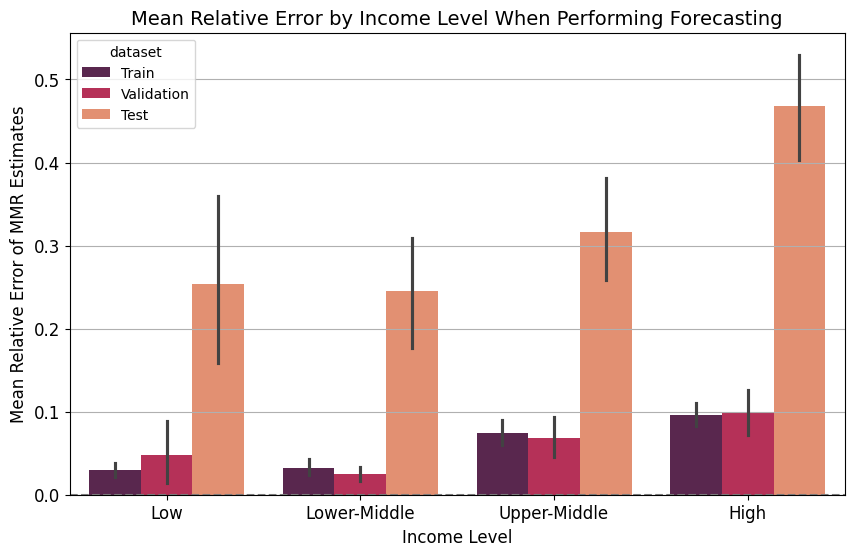

In [693]:
plt.figure(figsize=(10, 6))
sns.barplot(x='income level', y='predictive error', data=income_errors_year, hue = 'dataset', palette='rocket', order=['Low', 'Lower-Middle', 'Upper-Middle', 'High'], hue_order=['Train', 'Validation', 'Test'])
plt.axhline(0, color='gray', linestyle='--')
plt.title("Mean Relative Error by Income Level When Performing Forecasting", fontsize = 14)
plt.ylabel("Mean Relative Error of MMR Estimates", fontsize = 12)
plt.xlabel("Income Level", fontsize = 12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.show()

In [377]:
test_for_mse_year = pd.concat([pd.DataFrame(test_pred_year), pd.DataFrame(test_data_x_year['income_num'])], axis=1)
test_for_mse_year = pd.concat([test_for_mse_year, pd.DataFrame(test_data_y_year)], axis=1)
test_for_mse_year['squared error'] = (test_for_mse_year[0] - test_for_mse_year['Maternal mortality ratio (national estimate, per 100,000 live births)'])**2

train_for_mse_year = pd.concat([pd.DataFrame(train_pred_year), pd.DataFrame(train_x_year['income_num'])], axis=1)
train_for_mse_year = pd.concat([train_for_mse_year, pd.DataFrame(train_y_year)], axis=1)
train_for_mse_year['squared error'] = (train_for_mse_year[0] - train_for_mse_year['Maternal mortality ratio (national estimate, per 100,000 live births)'])**2

val_for_mse_year = pd.concat([pd.DataFrame(val_pred_year), pd.DataFrame(val_x_year['income_num'])], axis=1)
val_for_mse_year = pd.concat([val_for_mse_year, pd.DataFrame(val_y_year)], axis=1)
val_for_mse_year['squared error'] = (val_for_mse_year[0] - val_for_mse_year['Maternal mortality ratio (national estimate, per 100,000 live births)'])**2

In [378]:
train_for_mse_year['dataset'] = 'Train'
val_for_mse_year['dataset'] = 'Validation'
test_for_mse_year['dataset'] = 'Test'

In [379]:
year_mse_df = pd.concat([train_for_mse_year[['squared error', 'income_num', 'dataset']], val_for_mse_year[['squared error', 'income_num', 'dataset']]], axis=0)
year_mse_df = pd.concat([year_mse_df, test_for_mse_year[['squared error', 'income_num', 'dataset']]], axis=0)

In [380]:
year_mse_df = year_mse_df.reset_index(drop=True)

In [403]:
colors = sns.color_palette("rocket", 4)

# The first one is the pale color
pale_color = colors[0]
print("Pale color (RGB):", pale_color)

Pale color (RGB): (0.29977678, 0.11356089, 0.29254823)


In [421]:
test_for_mse_year.groupby(['income_num', 'dataset']).mean()

0  \
income_num dataset               
1.0        Test     572.854286   
2.0        Test     164.926109   
3.0        Test      43.213174   
4.0        Test       7.807960   

                    Maternal mortality ratio (national estimate, per 100,000 live births)  \
income_num dataset                                                                          
1.0        Test                                            707.000000                       
2.0        Test                                            168.558824                       
3.0        Test                                             46.257143                       
4.0        Test                                              8.673913                       

                    squared error  
income_num dataset                 
1.0        Test      88585.363533  
2.0        Test      10939.312915  
3.0        Test        605.909141  
4.0        Test         84.676671

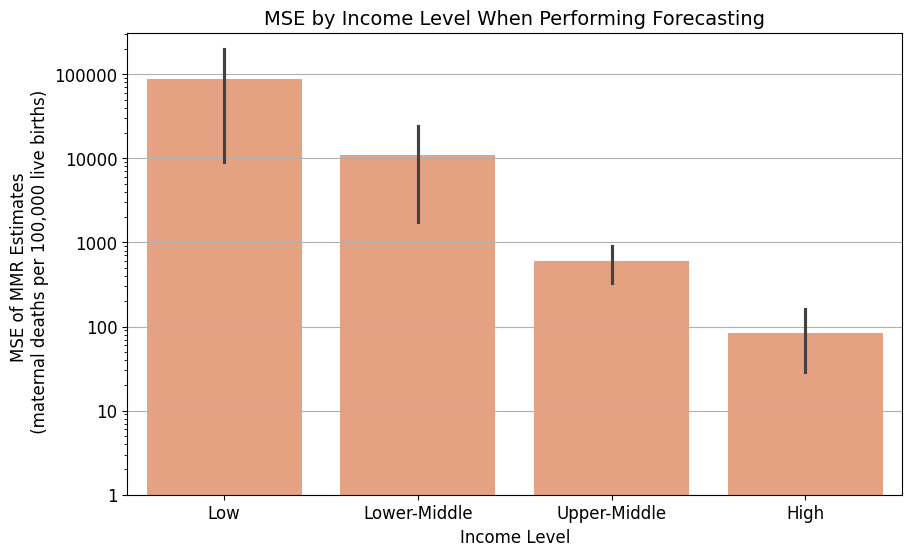

In [598]:
plt.figure(figsize=(10, 6))
sns.barplot(x='income_num', y='squared error', data=test_for_mse_year, color=colors[-1])
plt.axhline(0, color='gray', linestyle='--')
plt.title("MSE by Income Level When Performing Forecasting", fontsize = 14)
plt.ylabel("MSE of MMR Estimates \n (maternal deaths per 100,000 live births)", fontsize = 12)
plt.xlabel("Income Level", fontsize = 12)
plt.xticks(fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3], labels=["Low", "Lower-Middle", "Upper-Middle", "High"])
plt.yticks(fontsize=12)
plt.yscale('log')
plt.yticks(ticks=[1, 10, 100, 1000, 10000, 100000], labels=[1, 10, 100, 1000, 10000, 100000])
plt.grid(axis='y')
plt.show()

### both

In [136]:
pred_error_income['Split'] = 'Missing Data Analysis'
pred_error_year['Split'] = 'Predictive Analysis'

In [138]:
pred_error = pd.concat([pred_error_income, pred_error_year])

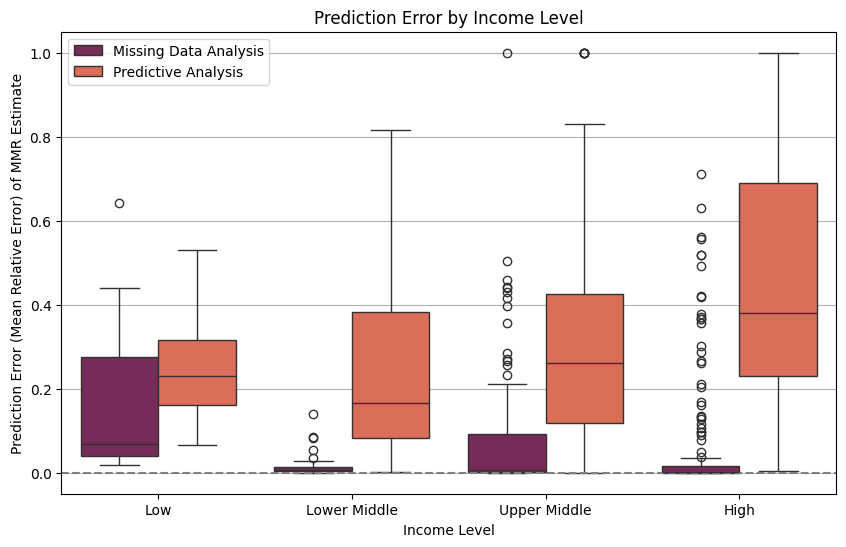

In [144]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Level', y='Prediction Error', data=pred_error, hue='Split', palette='rocket')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Prediction Error by Income Level")
plt.ylabel("Prediction Error (Mean Relative Error) of MMR Estimate")
plt.xlabel("Income Level")
plt.grid(axis='y')
plt.legend()
plt.show()

## Comparison to the Literature

### country-level prediction

In [583]:
year_comp = joblib.load("../split_year_models/ensemble/all_comp.pkl")
inc_comp = joblib.load("../split_income_models/ensemble/all_comp.pkl")

In [584]:
year_comp = year_comp.rename(columns={'ensemble_mmr':'ensemble_year'})
inc_comp = inc_comp.rename(columns={'ensemble_mmr':'ensemble_inc'})

In [570]:
lit_comp = pd.merge(year_comp, inc_comp, on=['year', 'name', 'national_estimate', 'mortality', 'mortality_lb', 'mortality_ub', 'FactValueNumeric', 'FactValueNumericLow', 'FactValueNumericHigh', 'val', 'upper', 'lower'], how='outer')

In [572]:
lit_comp = lit_comp.sort_values('year')

In [585]:
inc_comp = inc_comp.sort_values('year')

In [582]:
test_full_inc[test_full_inc['income_num'] == 4]['setting'].unique()

array(['Germany', 'Korea, Rep.', 'New Zealand', 'Israel',
       'Trinidad and Tobago', 'Saudi Arabia'], dtype=object)

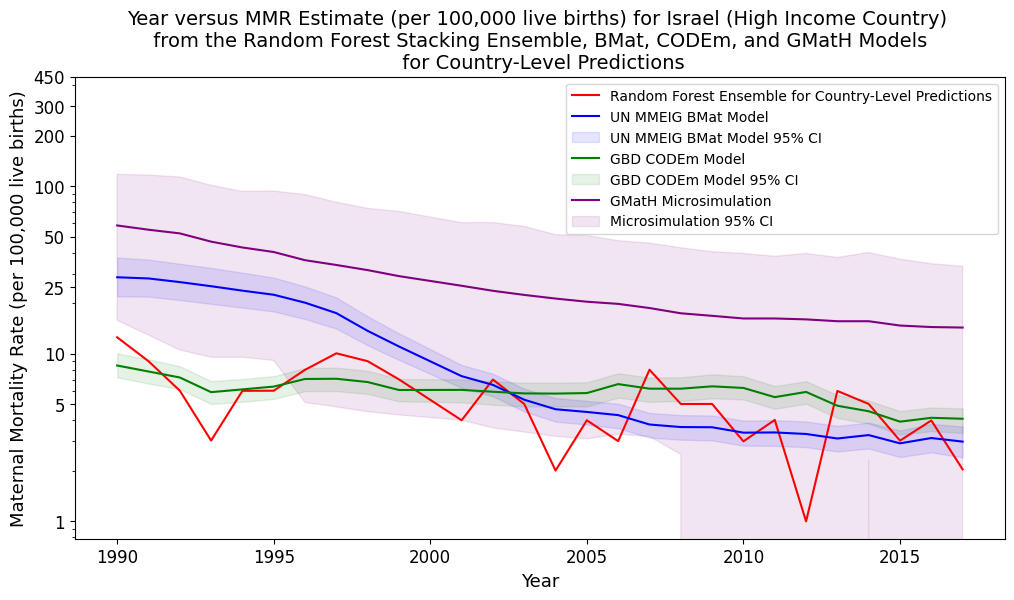

In [694]:
plt.figure(figsize=(12, 6))
plt.plot(inc_comp[inc_comp['name'] == 'Israel']['year'], inc_comp[inc_comp['name'] == 'Israel']['ensemble_inc'], label='Random Forest Ensemble for Country-Level Predictions', c='red')
plt.plot(inc_comp[inc_comp['name'] == 'Israel']['year'], inc_comp[inc_comp['name'] == 'Israel']['FactValueNumeric'], label='UN MMEIG BMat Model', c='blue')
plt.fill_between(inc_comp[inc_comp['name'] == 'Israel']['year'], inc_comp[inc_comp['name'] == 'Israel']['FactValueNumericLow'],  inc_comp[inc_comp['name'] == 'Israel']['FactValueNumericHigh'], alpha=0.1, color='blue', label='UN MMEIG BMat Model 95% CI')
plt.plot(inc_comp[inc_comp['name'] == 'Israel']['year'], inc_comp[inc_comp['name'] == 'Israel']['val'], label='GBD CODEm Model', c='green')
plt.fill_between(inc_comp[inc_comp['name'] == 'Israel']['year'], inc_comp[inc_comp['name'] == 'Israel']['lower'],  inc_comp[inc_comp['name'] == 'Israel']['upper'], alpha=0.1, color='green', label='GBD CODEm Model 95% CI')
plt.plot(inc_comp[inc_comp['name'] == 'Israel']['year'], inc_comp[inc_comp['name'] == 'Israel']['mortality'], label='GMatH Microsimulation', c='purple')
plt.fill_between(inc_comp[inc_comp['name'] == 'Israel']['year'], inc_comp[inc_comp['name'] == 'Israel']['mortality_lb'],  inc_comp[inc_comp['name'] == 'Israel']['mortality_ub'], alpha=0.1, color='purple', label='Microsimulation 95% CI')
plt.legend()
plt.xlabel('Year', fontsize=13)
plt.ylabel('Maternal Mortality Rate (per 100,000 live births)', fontsize=13)
plt.title('Year versus MMR Estimate (per 100,000 live births) for Israel (High Income Country) \n from the Random Forest Stacking Ensemble, BMat, CODEm, and GMatH Models \n for Country-Level Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yscale('log')
plt.yticks(ticks=[1, 5, 10, 25, 50, 100, 200, 300, 450], labels=[1, 5, 10, 25, 50, 100, 200, 300, 450], fontsize=12)
plt.show()

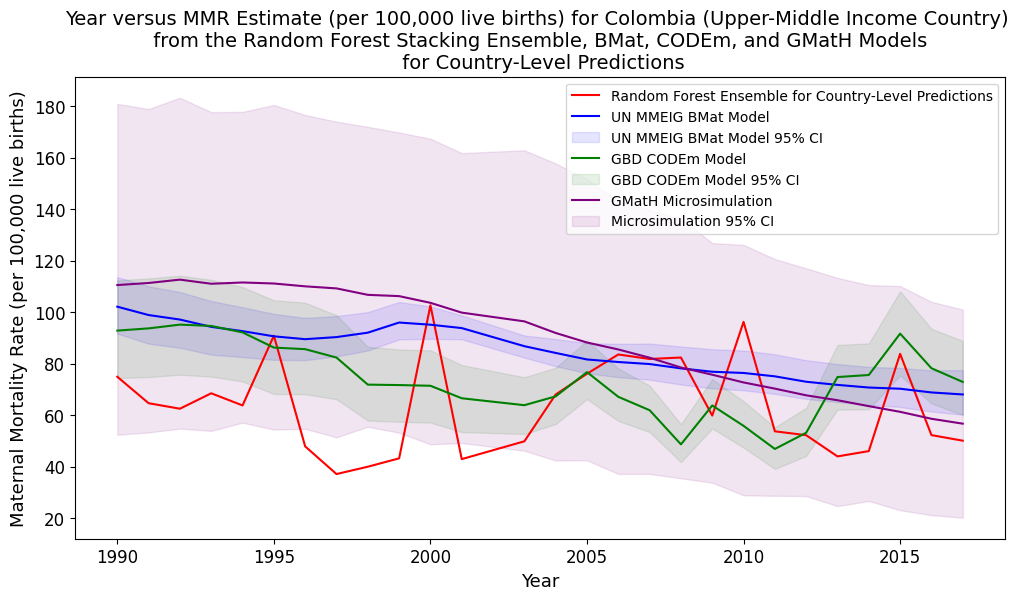

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(inc_comp[inc_comp['name'] == 'Colombia']['year'], inc_comp[inc_comp['name'] == 'Colombia']['ensemble_inc'], label='Random Forest Ensemble for Country-Level Predictions', c='red')
plt.plot(inc_comp[inc_comp['name'] == 'Colombia']['year'], inc_comp[inc_comp['name'] == 'Colombia']['FactValueNumeric'], label='UN MMEIG BMat Model', c='blue')
plt.fill_between(inc_comp[inc_comp['name'] == 'Colombia']['year'], inc_comp[inc_comp['name'] == 'Colombia']['FactValueNumericLow'],  inc_comp[inc_comp['name'] == 'Colombia']['FactValueNumericHigh'], alpha=0.1, color='blue', label='UN MMEIG BMat Model 95% CI')
plt.plot(inc_comp[inc_comp['name'] == 'Colombia']['year'], inc_comp[inc_comp['name'] == 'Colombia']['val'], label='GBD CODEm Model', c='green')
plt.fill_between(inc_comp[inc_comp['name'] == 'Colombia']['year'], inc_comp[inc_comp['name'] == 'Colombia']['lower'], inc_comp[inc_comp['name'] == 'Colombia']['upper'], alpha=0.1, color='green', label='GBD CODEm Model 95% CI')
plt.plot(inc_comp[inc_comp['name'] == 'Colombia']['year'], inc_comp[inc_comp['name'] == 'Colombia']['mortality'], label='GMatH Microsimulation', c='purple')
plt.fill_between(inc_comp[inc_comp['name'] == 'Colombia']['year'], inc_comp[inc_comp['name'] == 'Colombia']['mortality_lb'],  inc_comp[inc_comp['name'] == 'Colombia']['mortality_ub'], alpha=0.1, color='purple', label='Microsimulation 95% CI')
plt.legend()
plt.xlabel('Year', fontsize=13)
plt.ylabel('Maternal Mortality Rate (per 100,000 live births)', fontsize=13)
plt.title('Year versus MMR Estimate (per 100,000 live births) for Colombia (Upper-Middle Income Country) \n from the Random Forest Stacking Ensemble, BMat, CODEm, and GMatH Models \n for Country-Level Predictions', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [649]:
inc_comp[inc_comp['name'] == 'Rwanda']

year    name  ensemble_inc  national_estimate  mortality  mortality_lb  \
167  2000.0  Rwanda   1024.816425              994.0     1141.7         765.6   
5    2005.0  Rwanda    965.937198              985.0      756.1         458.5   
32   2010.0  Rwanda    755.565217              785.0      454.8         239.8   
54   2015.0  Rwanda    312.101449              297.0      269.5          78.5   

     mortality_ub  percent_diff  FactValueNumeric  FactValueNumericLow  \
167        1549.5    -10.237678             885.2                713.0   
5          1115.4     27.752572             465.4                382.4   
32          750.5     66.131314             392.9                317.3   
54          559.0     15.807588             291.6                224.0   

     FactValueNumericHigh  percent_diff_mmeig         val       upper  \
167                1091.0           15.772303  532.302328  674.477645   
5                   569.3          107.549892  447.594852  552.833127   
32                  488.8           92.304713  335.704252  427.230755   
54                  384.1            7.030675  267.887150  357.576444   

          lower  percent_diff_gbd  
167  406.503296         92.525257  
5    347.406434        115.806145  
32   253.320862        125.068707  
54   194.247714         16.504823

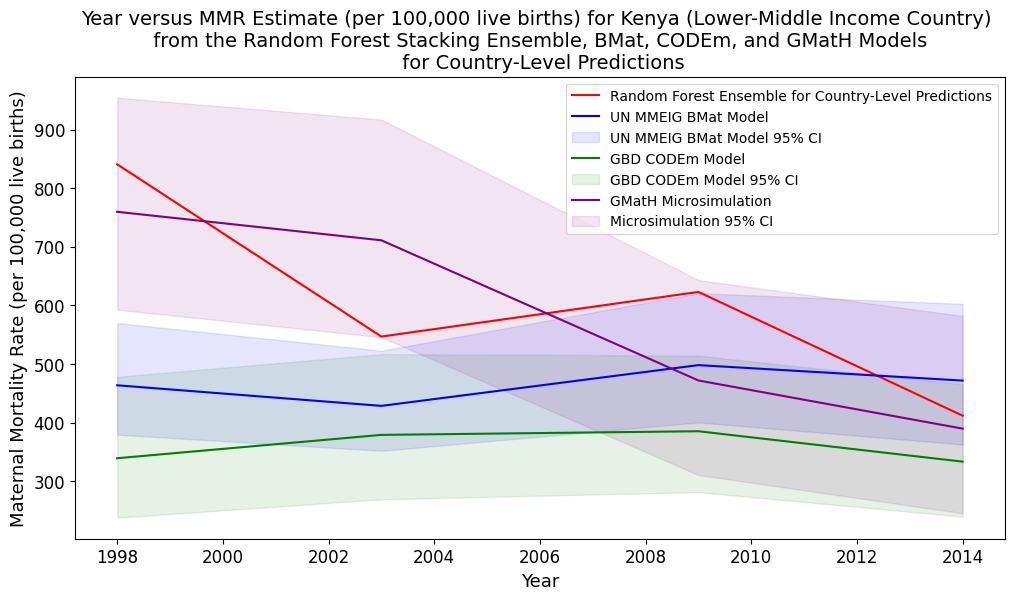

In [454]:
plt.figure(figsize=(12, 6))
plt.plot(inc_comp[inc_comp['name'] == 'Kenya']['year'], inc_comp[inc_comp['name'] == 'Kenya']['ensemble_inc'], label='Random Forest Ensemble for Country-Level Predictions', c='red')
plt.plot(inc_comp[inc_comp['name'] == 'Kenya']['year'], inc_comp[inc_comp['name'] == 'Kenya']['FactValueNumeric'], label='UN MMEIG BMat Model', c='blue')
plt.fill_between(inc_comp[inc_comp['name'] == 'Kenya']['year'], inc_comp[inc_comp['name'] == 'Kenya']['FactValueNumericLow'],  inc_comp[inc_comp['name'] == 'Kenya']['FactValueNumericHigh'], alpha=0.1, color='blue', label='UN MMEIG BMat Model 95% CI')
plt.plot(inc_comp[inc_comp['name'] == 'Kenya']['year'], inc_comp[inc_comp['name'] == 'Kenya']['val'], label='GBD CODEm Model', c='green')
plt.fill_between(inc_comp[inc_comp['name'] == 'Kenya']['year'], inc_comp[inc_comp['name'] == 'Kenya']['lower'],  inc_comp[inc_comp['name'] == 'Kenya']['upper'], alpha=0.1, color='green', label='GBD CODEm Model 95% CI')
plt.plot(inc_comp[inc_comp['name'] == 'Kenya']['year'], inc_comp[inc_comp['name'] == 'Kenya']['mortality'], label='GMatH Microsimulation', c='purple')
plt.fill_between(inc_comp[inc_comp['name'] == 'Kenya']['year'], inc_comp[inc_comp['name'] == 'Kenya']['mortality_lb'],  inc_comp[inc_comp['name'] == 'Kenya']['mortality_ub'], alpha=0.1, color='purple', label='Microsimulation 95% CI')
plt.legend()
plt.xlabel('Year', fontsize=13)
plt.ylabel('Maternal Mortality Rate (per 100,000 live births)', fontsize=13)
plt.title('Year versus MMR Estimate (per 100,000 live births) for Kenya (Lower-Middle Income Country) \n from the Random Forest Stacking Ensemble, BMat, CODEm, and GMatH Models \n for Country-Level Predictions', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

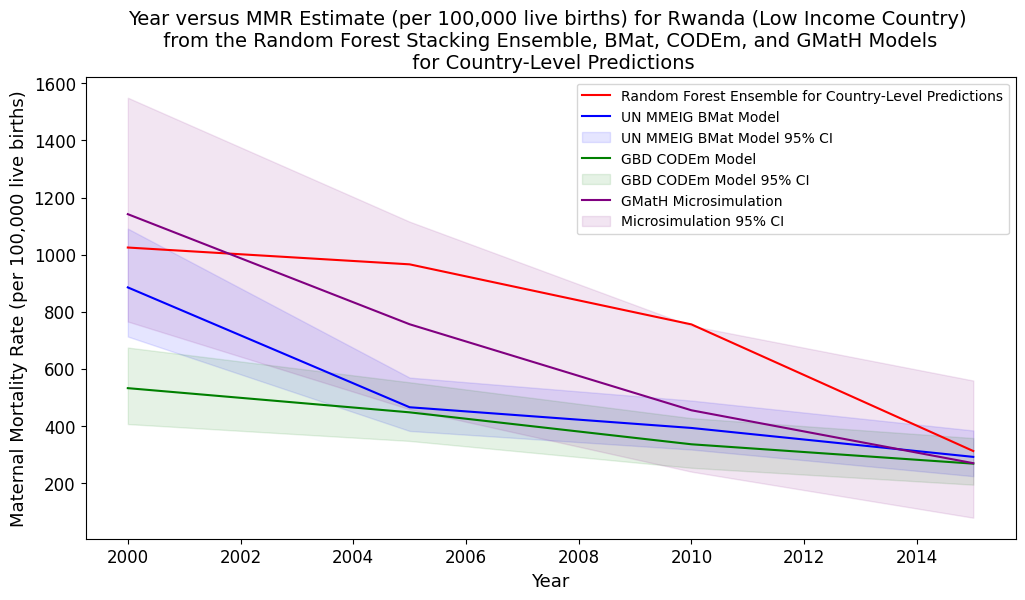

In [456]:
plt.figure(figsize=(12, 6))
plt.plot(inc_comp[inc_comp['name'] == 'Rwanda']['year'], inc_comp[inc_comp['name'] == 'Rwanda']['ensemble_inc'], label='Random Forest Ensemble for Country-Level Predictions', c='red')
plt.plot(inc_comp[inc_comp['name'] == 'Rwanda']['year'], inc_comp[inc_comp['name'] == 'Rwanda']['FactValueNumeric'], label='UN MMEIG BMat Model', c='blue')
plt.fill_between(inc_comp[inc_comp['name'] == 'Rwanda']['year'], inc_comp[inc_comp['name'] == 'Rwanda']['FactValueNumericLow'],  inc_comp[inc_comp['name'] == 'Rwanda']['FactValueNumericHigh'], alpha=0.1, color='blue', label='UN MMEIG BMat Model 95% CI')
plt.plot(inc_comp[inc_comp['name'] == 'Rwanda']['year'], inc_comp[inc_comp['name'] == 'Rwanda']['val'], label='GBD CODEm Model', c='green')
plt.fill_between(inc_comp[inc_comp['name'] == 'Rwanda']['year'], inc_comp[inc_comp['name'] == 'Rwanda']['lower'],  inc_comp[inc_comp['name'] == 'Rwanda']['upper'], alpha=0.1, color='green', label='GBD CODEm Model 95% CI')
plt.plot(inc_comp[inc_comp['name'] == 'Rwanda']['year'], inc_comp[inc_comp['name'] == 'Rwanda']['mortality'], label='GMatH Microsimulation', c='purple')
plt.fill_between(inc_comp[inc_comp['name'] == 'Rwanda']['year'], inc_comp[inc_comp['name'] == 'Rwanda']['mortality_lb'],  inc_comp[inc_comp['name'] == 'Rwanda']['mortality_ub'], alpha=0.1, color='purple', label='Microsimulation 95% CI')
plt.legend()
plt.xlabel('Year', fontsize=13)
plt.ylabel('Maternal Mortality Rate (per 100,000 live births)', fontsize=13)
plt.title('Year versus MMR Estimate (per 100,000 live births) for Rwanda (Low Income Country) \n from the Random Forest Stacking Ensemble, BMat, CODEm, and GMatH Models \n for Country-Level Predictions', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

### Forecasting

In [645]:
year_comp = joblib.load("../split_year_models/ensemble/all_comp.pkl")

In [639]:
test_full_year =  pd.read_csv('../data_with_yearcountry/year/test/X_test.csv')
test_full_year[test_full_year['income_num'] == 4]['setting'].unique()

array(['Korea, Rep.', 'Belgium', 'Oman', 'Uruguay', 'Sweden',
       'Slovak Republic', 'Brunei Darussalam', 'Spain', 'France',
       'Singapore', 'Chile', 'Denmark', 'Norway', 'Finland', 'Estonia',
       'Australia', 'Italy', 'Portugal', 'Germany', 'Lithuania', 'Cyprus',
       'Czechia', 'Poland', 'Austria', 'New Zealand', 'Hungary', 'Japan',
       'Israel', 'United Kingdom', 'Iceland', 'Panama', 'Canada',
       'Slovenia', 'Switzerland', 'Croatia', 'Netherlands', 'Malta',
       'Romania', 'Qatar', 'United States', 'Greece', 'Puerto Rico',
       'Ireland', 'Russian Federation', 'Latvia', 'Luxembourg'],
      dtype=object)

In [646]:
year_comp = year_comp.rename(columns={'ensemble_mmr':'ensemble_year'})
year_comp = year_comp.sort_values('year')

In [641]:
year_comp[year_comp['name'] == 'New Zealand']

year         name  ensemble_year  national_estimate  mortality  \
141  2015.0  New Zealand      11.107788                3.0       50.4   
67   2016.0  New Zealand       9.882905               10.0       49.3   

     mortality_lb  mortality_ub  percent_diff  FactValueNumeric  \
141           0.0         175.5    -77.960738              8.05   
67            0.0         177.3    -79.953540              7.67   

     FactValueNumericLow  FactValueNumericHigh  percent_diff_mmeig       val  \
141                 6.44                  9.56           37.984944  9.980775   
67                  5.92                  9.23           28.851431  8.160880   

         upper     lower  percent_diff_gbd  
141  11.835518  8.537373         11.291837  
67    9.782115  6.881122         21.100973

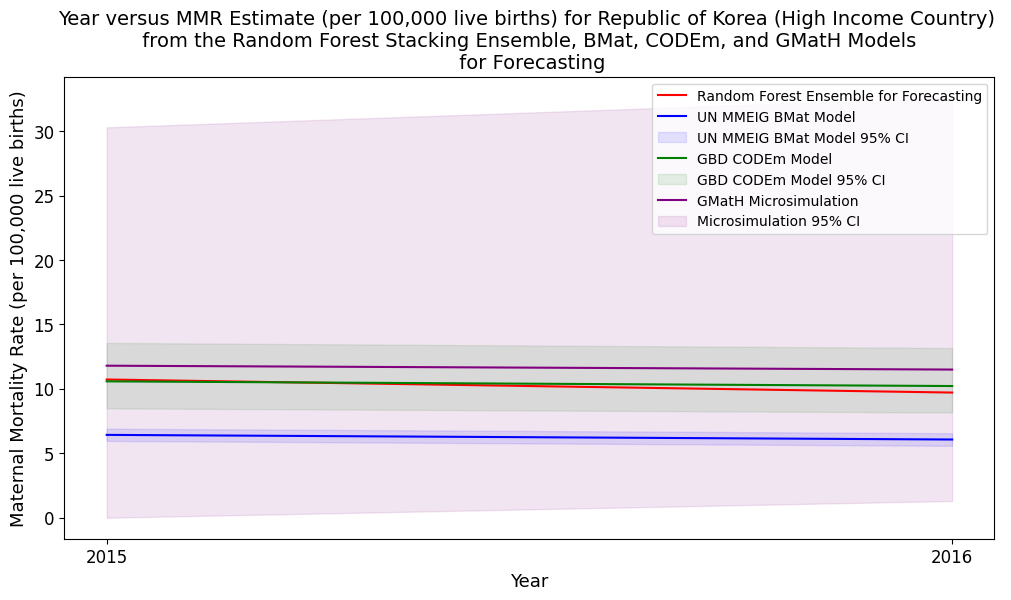

In [647]:
plt.figure(figsize=(12, 6))
plt.plot(year_comp[year_comp['name'] == 'Republic of Korea']['year'], year_comp[year_comp['name'] == 'Republic of Korea']['ensemble_year'], label='Random Forest Ensemble for Forecasting', c='red')
plt.plot(year_comp[year_comp['name'] == 'Republic of Korea']['year'], year_comp[year_comp['name'] == 'Republic of Korea']['FactValueNumeric'], label='UN MMEIG BMat Model', c='blue')
plt.fill_between(year_comp[year_comp['name'] == 'Republic of Korea']['year'], year_comp[year_comp['name'] == 'Republic of Korea']['FactValueNumericLow'],  year_comp[year_comp['name'] == 'Republic of Korea']['FactValueNumericHigh'], alpha=0.1, color='blue', label='UN MMEIG BMat Model 95% CI')
plt.plot(year_comp[year_comp['name'] == 'Republic of Korea']['year'], year_comp[year_comp['name'] == 'Republic of Korea']['val'], label='GBD CODEm Model', c='green')
plt.fill_between(year_comp[year_comp['name'] == 'Republic of Korea']['year'], year_comp[year_comp['name'] == 'Republic of Korea']['lower'],  year_comp[year_comp['name'] == 'Republic of Korea']['upper'], alpha=0.1, color='green', label='GBD CODEm Model 95% CI')
plt.plot(year_comp[year_comp['name'] == 'Republic of Korea']['year'], year_comp[year_comp['name'] == 'Republic of Korea']['mortality'], label='GMatH Microsimulation', c='purple')
plt.fill_between(year_comp[year_comp['name'] == 'Republic of Korea']['year'], year_comp[year_comp['name'] == 'Republic of Korea']['mortality_lb'],  year_comp[year_comp['name'] == 'Republic of Korea']['mortality_ub'], alpha=0.1, color='purple', label='Microsimulation 95% CI')
plt.legend()
plt.xlabel('Year', fontsize=13)
plt.ylabel('Maternal Mortality Rate (per 100,000 live births)', fontsize=13)
plt.title('Year versus MMR Estimate (per 100,000 live births) for Republic of Korea (High Income Country) \n from the Random Forest Stacking Ensemble, BMat, CODEm, and GMatH Models \n for Forecasting', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, ticks=[2015, 2016], labels=[2015, 2016])
plt.legend(loc='upper right')
plt.show()

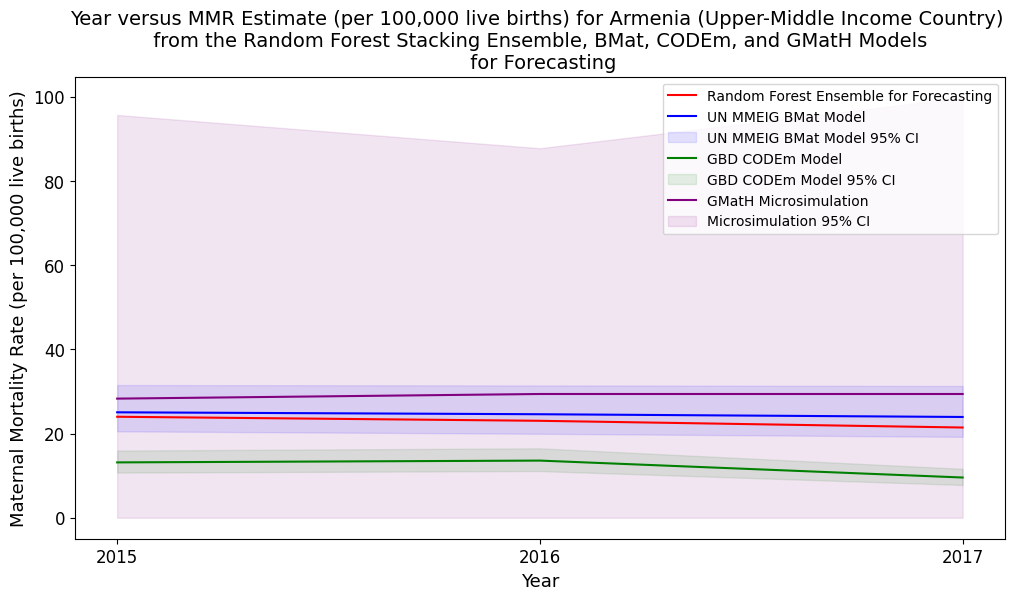

In [696]:
plt.figure(figsize=(12, 6))
plt.plot(year_comp[year_comp['name'] == 'Armenia']['year'], year_comp[year_comp['name'] == 'Armenia']['ensemble_year'], label='Random Forest Ensemble for Forecasting', c='red')
plt.plot(year_comp[year_comp['name'] == 'Armenia']['year'], year_comp[year_comp['name'] == 'Armenia']['FactValueNumeric'], label='UN MMEIG BMat Model', c='blue')
plt.fill_between(year_comp[year_comp['name'] == 'Armenia']['year'], year_comp[year_comp['name'] == 'Armenia']['FactValueNumericLow'],  year_comp[year_comp['name'] == 'Armenia']['FactValueNumericHigh'], alpha=0.1, color='blue', label='UN MMEIG BMat Model 95% CI')
plt.plot(year_comp[year_comp['name'] == 'Armenia']['year'], year_comp[year_comp['name'] == 'Armenia']['val'], label='GBD CODEm Model', c='green')
plt.fill_between(year_comp[year_comp['name'] == 'Armenia']['year'], year_comp[year_comp['name'] == 'Armenia']['lower'],  year_comp[year_comp['name'] == 'Armenia']['upper'], alpha=0.1, color='green', label='GBD CODEm Model 95% CI')
plt.plot(year_comp[year_comp['name'] == 'Armenia']['year'], year_comp[year_comp['name'] == 'Armenia']['mortality'], label='GMatH Microsimulation', c='purple')
plt.fill_between(year_comp[year_comp['name'] == 'Armenia']['year'], year_comp[year_comp['name'] == 'Armenia']['mortality_lb'],  year_comp[year_comp['name'] == 'Armenia']['mortality_ub'], alpha=0.1, color='purple', label='Microsimulation 95% CI')
plt.legend()
plt.xlabel('Year', fontsize=13)
plt.ylabel('Maternal Mortality Rate (per 100,000 live births)', fontsize=13)
plt.title('Year versus MMR Estimate (per 100,000 live births) for Armenia (Upper-Middle Income Country) \n from the Random Forest Stacking Ensemble, BMat, CODEm, and GMatH Models \n for Forecasting', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, ticks=[2015, 2016, 2017], labels=[2015, 2016, 2017])
plt.legend(loc='upper right')
plt.show()

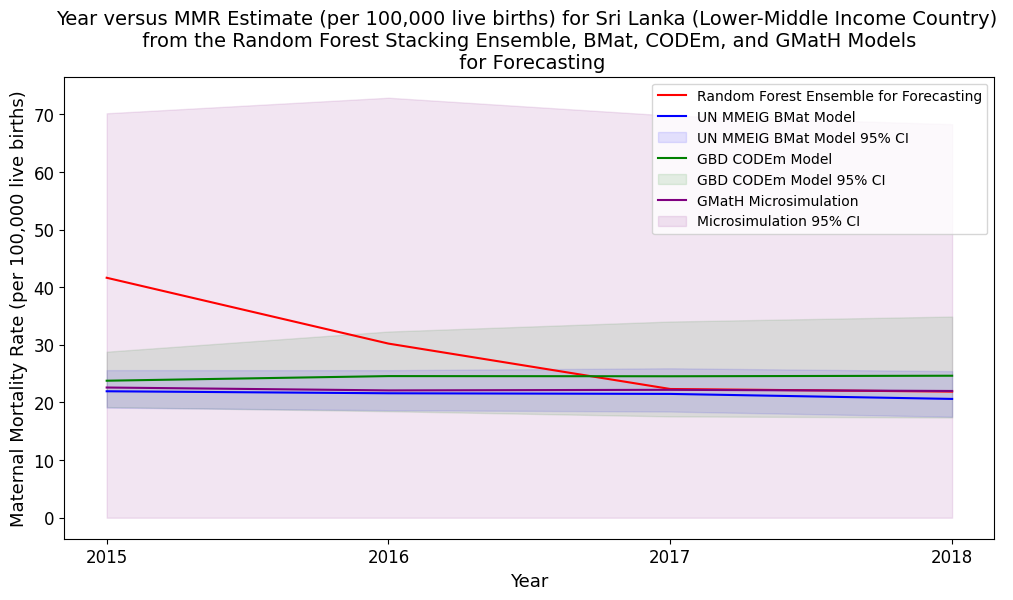

In [500]:
plt.figure(figsize=(12, 6))
plt.plot(year_comp[year_comp['name'] == 'Sri Lanka']['year'], year_comp[year_comp['name'] == 'Sri Lanka']['ensemble_year'], label='Random Forest Ensemble for Forecasting', c='red')
plt.plot(year_comp[year_comp['name'] == 'Sri Lanka']['year'], year_comp[year_comp['name'] == 'Sri Lanka']['FactValueNumeric'], label='UN MMEIG BMat Model', c='blue')
plt.fill_between(year_comp[year_comp['name'] == 'Sri Lanka']['year'], year_comp[year_comp['name'] == 'Sri Lanka']['FactValueNumericLow'],  year_comp[year_comp['name'] == 'Sri Lanka']['FactValueNumericHigh'], alpha=0.1, color='blue', label='UN MMEIG BMat Model 95% CI')
plt.plot(year_comp[year_comp['name'] == 'Sri Lanka']['year'], year_comp[year_comp['name'] == 'Sri Lanka']['val'], label='GBD CODEm Model', c='green')
plt.fill_between(year_comp[year_comp['name'] == 'Sri Lanka']['year'], year_comp[year_comp['name'] == 'Sri Lanka']['lower'],  year_comp[year_comp['name'] == 'Sri Lanka']['upper'], alpha=0.1, color='green', label='GBD CODEm Model 95% CI')
plt.plot(year_comp[year_comp['name'] == 'Sri Lanka']['year'], year_comp[year_comp['name'] == 'Sri Lanka']['mortality'], label='GMatH Microsimulation', c='purple')
plt.fill_between(year_comp[year_comp['name'] == 'Sri Lanka']['year'], year_comp[year_comp['name'] == 'Sri Lanka']['mortality_lb'],  year_comp[year_comp['name'] == 'Sri Lanka']['mortality_ub'], alpha=0.1, color='purple', label='Microsimulation 95% CI')
plt.legend()
plt.xlabel('Year', fontsize=13)
plt.ylabel('Maternal Mortality Rate (per 100,000 live births)', fontsize=13)
plt.title('Year versus MMR Estimate (per 100,000 live births) for Sri Lanka (Lower-Middle Income Country) \n from the Random Forest Stacking Ensemble, BMat, CODEm, and GMatH Models \n for Forecasting', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, ticks=[2015, 2016, 2017, 2018], labels=[2015, 2016, 2017, 2018])
plt.legend(loc='upper right')
plt.show()

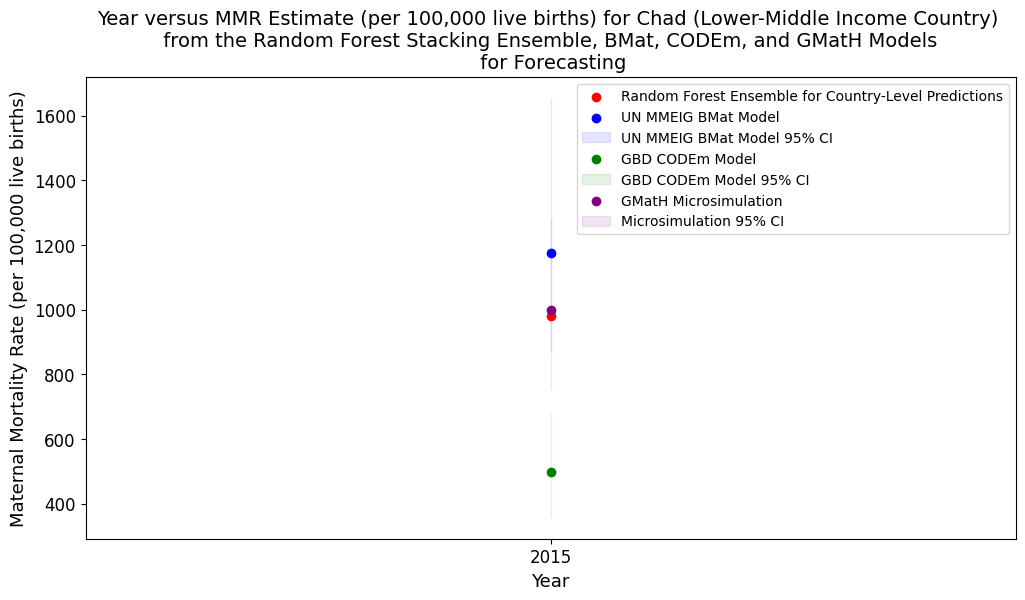

In [590]:
plt.figure(figsize=(12, 6))
plt.scatter(2015, year_comp[year_comp['name'] == 'Chad']['ensemble_year'], label='Random Forest Ensemble for Country-Level Predictions', c='red')
plt.scatter(2015, year_comp[year_comp['name'] == 'Chad']['FactValueNumeric'], label='UN MMEIG BMat Model', c='blue')
plt.fill_between(2015, year_comp[year_comp['name'] == 'Chad']['FactValueNumericLow'],  year_comp[year_comp['name'] == 'Chad']['FactValueNumericHigh'], alpha=0.1, color='blue', label='UN MMEIG BMat Model 95% CI')
plt.scatter(2015, year_comp[year_comp['name'] == 'Chad']['val'], label='GBD CODEm Model', c='green')
plt.fill_between(2015, year_comp[year_comp['name'] == 'Chad']['lower'],  year_comp[year_comp['name'] == 'Chad']['upper'], alpha=0.1, color='green', label='GBD CODEm Model 95% CI')
plt.scatter(2015, year_comp[year_comp['name'] == 'Chad']['mortality'], label='GMatH Microsimulation', c='purple')
plt.fill_between(2015, year_comp[year_comp['name'] == 'Chad']['mortality_lb'],  year_comp[year_comp['name'] == 'Chad']['mortality_ub'], alpha=0.1, color='purple', label='Microsimulation 95% CI')
plt.legend()
plt.xlabel('Year', fontsize=13)
plt.ylabel('Maternal Mortality Rate (per 100,000 live births)', fontsize=13)
plt.title('Year versus MMR Estimate (per 100,000 live births) for Chad (Lower-Middle Income Country) \n from the Random Forest Stacking Ensemble, BMat, CODEm, and GMatH Models \n for Forecasting', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, ticks=[2015], labels=[2015])
plt.show()